# **Chap 4. 지도학습**

## **2. Regression**








### --> Multiple Linear Regression / Ridge/ Lasso / ElasticNet



In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt  
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn import metrics

# 경고무시
import warnings
warnings.filterwarnings("ignore")

#### Dataset: Boston Housing

In [ ]:
# Boston 데이터 세트 로드
boston = datasets.load_boston()

# boston 데이터 세트 DataFrame 변환
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트의 target 값인 주택 가격을 Price column으로 DataFrame에 추가
boston_df['PRICE'] = boston.target
print(f'Boston Dataset Shape: {boston_df.shape}')
boston_df.head(10)

Boston Dataset Shape: (506, 14)


CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
5     18.7  394.12   5.21   28.7  
6     15.2  395.60  12.43   22.9  
7     15.2  396.90  19.15   27.1  
8     15.2  386.63  29.93   16.5  
9     15.2  386.71  17.10   18.9

In [ ]:
# 결측값 확인
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
# Train Test split
y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 0,
                                                    )

In [ ]:
# 사용할 회귀 모델이 저장된 리스트 생성
regressors = [LinearRegression(),
              Ridge(),
              Lasso(),
              ElasticNet(),
              ]

# 회귀 모델의 이름이 저장된 리스트 생성
regressor_names = ['Linear',
                  'Ridge',
                  'Lasso',
                  'ElasticNet',
                  ]

# 결과를 저장할 리스트 생성
model_rmse = []
model_rmse_means = []
model_names = []

regressor_data = zip(regressor_names, regressors)

# 각 회귀 모형을 실행한 뒤 결과 저장
for regressor_name, regressor in regressor_data:
  # K Fold 교차 검증 설정 / 10개의 구간으로 분할
  kf = KFold(n_splits = 10, shuffle = True, random_state = 0)

  # 교차 검증 실행 후 결과 저장
  # 지표는 RMSE 사용
  nrmse_scores = cross_val_score(regressor,
                       X = X_train,
                       y = y_train,
                       cv = kf,
                       scoring = 'neg_root_mean_squared_error')
  
  # neagtive rmse이기 때문에 -1을 곱해서 rmse로 변환
  rmse_scores = -1 * nrmse_scores
  
  # rmse 값의 평균 출력
  print(f'Mean rmse score of {regressor_name}: {rmse_scores.mean():.3f}', '\n')

  # 결과 저장
  model_names.append(regressor_name)
  model_rmse.append(rmse_scores)
  model_rmse_means.append(rmse_scores.mean())

Mean rmse score of Linear: 4.691 

Mean rmse score of Ridge: 4.687 

Mean rmse score of Lasso: 5.121 

Mean rmse score of ElasticNet: 5.043 



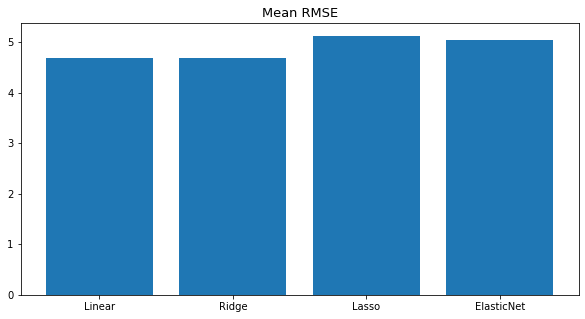

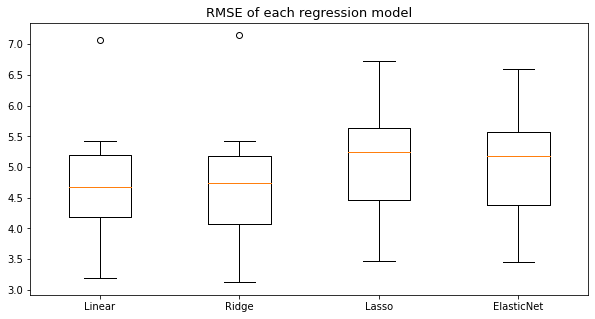

In [ ]:
# 회귀 모델별 RMSE 값의 평균을 막대 그래프로 출력
plt.figure(figsize = (10, 5))
plt.bar(model_names, model_rmse_means)
plt.title('Mean RMSE', size = 13)
plt.show()

# 회귀 모델별 결과를 Box plot으로 출력
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
ax.boxplot(model_rmse)
ax.set_xticklabels(model_names)
plt.title('RMSE of each regression model', size = 13)
plt.show()

## **3~8. Classification**


### --> GaussianNB / KNN / Logistic Regression / Decision Tree / Random Forest / AdaBoost / GBM / XGBoost / SVM

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt  
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn import metrics

# 경고무시
import warnings
warnings.filterwarnings("ignore")

#### Dataset: Breast Cancer

In [ ]:
# breast cancer 데이터 세트 로드
breast_cancer = datasets.load_breast_cancer()

# breast cancer 데이터 세트 DataFrame 변환
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

# breast cancer 데이터 세트의 target 값인 암 여부를 Type column으로 DataFrame에 추가
breast_cancer_df['Type'] = breast_cancer.target
print(f'Breast Cancer Dataset Shape: {breast_cancer_df.shape}')
breast_cancer_df.head(10)

Breast Cancer Dataset Shape: (569, 31)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0.07864         0.08690              0.07017         0.1812   
2           0.15990         0.19740              0.12790         0.2069   
3           0.28390         0.24140              0.10520         0.2597   
4           0.13280         0.19800              0.10430         0.1809   
5           0.17000         0.15780              0.08089         0.2087   
6           0.10900         0.11270              0.07400         0.1794   
7           0.16450         0.09366              0.05985         0.2196   
8           0.19320         0.18590              0.09353         0.2350   
9           0.23960         0.22730              0.08543         0.2030   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   
5                 0.07613  ...          23.75           103.40       741.6   
6                 0.05742  ...          27.66           153.20      1606.0   
7                 0.07451  ...          28.14           110.60       897.0   
8                 0.07389  ...          30.73           106.20       739.3   
9                 0.08243  ...          40.68            97.65       711.4   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   
5            0.1791             0.5249           0.5355                0.1741   
6            0.1442             0.2576           0.3784                0.1932   
7            0.1654             0.3682           0.2678                0.1556   
8            0.1703             0.5401           0.5390                0.2060   
9            0.1853             1.0580           1.1050                0.2210   

   worst symmetry  worst fractal dimension  Type  
0          0.4601                  0.11890     0  
1          0.2750                  0.08902     0  
2          0.3613                  0.08758     0  
3          0.6638                  0.17300     0  
4          0.2364                  0.07678     0  
5          0.3985                  0.12440     0  
6          0.3063                  0.08368     0  
7          0.3196                  0.11510     0  
8          0.4378                  0.10720     0  
9          0.4366                  0.20750     0  

[10 rows x 31 columns]

In [ ]:
# 결측값 확인
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Train Test split
y = breast_cancer_df['Type']
X = breast_cancer_df.drop(['Type'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    )

In [ ]:
# 사용할 분류 모델이 저장된 리스트 생성
classifiers = [GaussianNB(),
               KNeighborsClassifier(),
               LogisticRegression(random_state = 0),
               DecisionTreeClassifier(random_state = 0),
               RandomForestClassifier(random_state = 0),
               AdaBoostClassifier(random_state = 0),
               GradientBoostingClassifier(random_state = 0),
               XGBClassifier(random_state = 0),
               SVC(kernel = 'rbf', random_state = 0),
              ]

# 분류 모델의 이름이 저장된 리스트 생성
classifier_names = ['GaussianNB',
                    'KNN',
                    'Logistic',
                    'DT',
                    'RF',
                    'AdaBoost',
                    'GBC',
                    'XGB',
                    'SVC',
                  ]

# 결과를 저장할 리스트 생성
model_accuracies = []
model_accuracy_means = []
model_precisions = []
model_precision_means = []
model_recalls = []
model_recall_means = []
model_f1 = []
model_f1_means = []
model_names = []

classifier_data = zip(classifier_names, classifiers)

# 각 분류기를 실행한 뒤 결과 저장
for classifier_name, classifier in classifier_data:
  # StratifiedKFold 교차 검증 설정 / 10개의 구간으로 분할
  skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

  # 교차 검증 실행 후 결과 저장
  # 지표는 Accuracy, Precision, Recall, F1을 사용
  for performance_indicator in ['accuracy', 'precision', 'recall', 'f1']:
    scores = cross_val_score(classifier,
                             X = X_train,
                             y = y_train,
                             cv = skf,
                             scoring = performance_indicator)
    
    # 지표의 평균을 출력
    if performance_indicator == 'accuracy':
      print(f'Mean accuracy of {classifier_name}: {scores.mean():.3f}')
      model_accuracies.append(scores) # 결과 저장
      model_accuracy_means.append(scores.mean())

    elif performance_indicator == 'precision':
      print(f'Mean precison of {classifier_name}: {scores.mean():.3f}')
      model_precisions.append(scores) # 결과 저장
      model_precision_means.append(scores.mean())

    elif performance_indicator == 'recall':
      print(f'Mean recall of {classifier_name}: {scores.mean():.3f}')
      model_recalls.append(scores) # 결과 저장
      model_recall_means.append(scores.mean())

    elif performance_indicator == 'f1':
      print(f'Mean f1 score of {classifier_name}: {scores.mean():.3f}', '\n')
      model_f1.append(scores) # 결과 저장
      model_f1_means.append(scores.mean())

  # 결과 저장
  model_names.append(classifier_name)

Mean accuracy of GaussianNB: 0.943
Mean precison of GaussianNB: 0.938
Mean recall of GaussianNB: 0.976
Mean f1 score of GaussianNB: 0.956 

Mean accuracy of KNN: 0.929
Mean precison of KNN: 0.937
Mean recall of KNN: 0.955
Mean f1 score of KNN: 0.945 

Mean accuracy of Logistic: 0.945
Mean precison of Logistic: 0.944
Mean recall of Logistic: 0.972
Mean f1 score of Logistic: 0.958 

Mean accuracy of DT: 0.903
Mean precison of DT: 0.926
Mean recall of DT: 0.924
Mean f1 score of DT: 0.924 

Mean accuracy of RF: 0.958
Mean precison of RF: 0.960
Mean recall of RF: 0.976
Mean f1 score of RF: 0.968 

Mean accuracy of AdaBoost: 0.956
Mean precison of AdaBoost: 0.960
Mean recall of AdaBoost: 0.972
Mean f1 score of AdaBoost: 0.966 

Mean accuracy of GBC: 0.956
Mean precison of GBC: 0.966
Mean recall of GBC: 0.966
Mean f1 score of GBC: 0.965 

Mean accuracy of XGB: 0.954
Mean precison of XGB: 0.966
Mean recall of XGB: 0.962
Mean f1 score of XGB: 0.964 

Mean accuracy of SVC: 0.906
Mean precison of

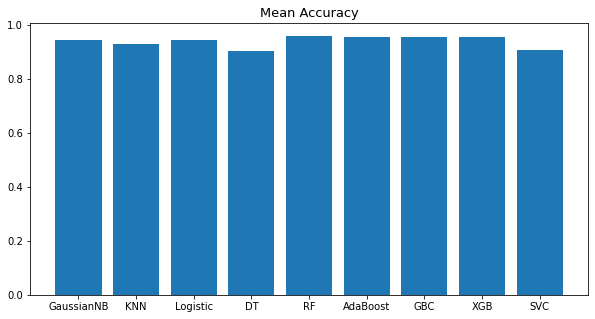

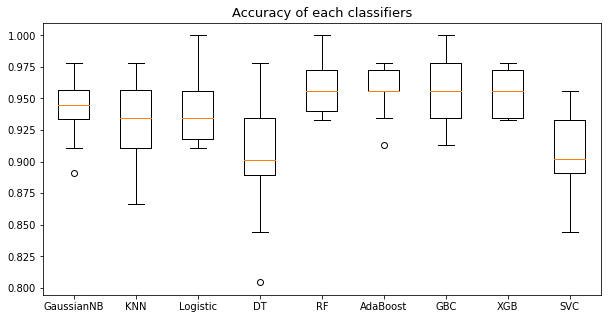

In [ ]:
# 분류 모델별 accuracy 값의 평균을 막대 그래프로 출력
plt.figure(figsize = (10, 5))
plt.bar(model_names, model_accuracy_means)
plt.title('Mean Accuracy', size = 13)
plt.show()

# 분류 모델별 결과를 Box plot으로 출력
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
ax.boxplot(model_accuracies)
ax.set_xticklabels(model_names)
plt.title('Accuracy of each classifiers', size = 13)
plt.show()

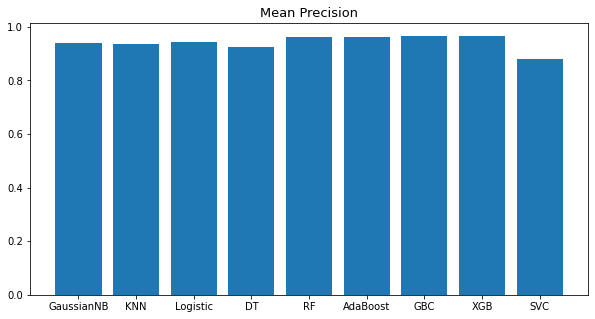

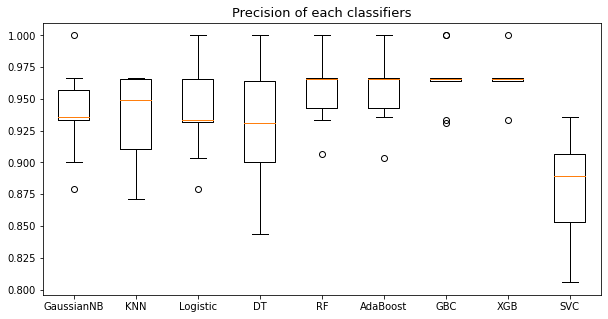

In [ ]:
# 분류 모델별 precision 값의 평균을 막대 그래프로 출력
plt.figure(figsize = (10, 5))
plt.bar(model_names, model_precision_means)
plt.title('Mean Precision', size = 13)
plt.show()

# 분류 모델별 결과를 Box plot으로 출력
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
ax.boxplot(model_precisions)
ax.set_xticklabels(model_names)
plt.title('Precision of each classifiers', size = 13)
plt.show()

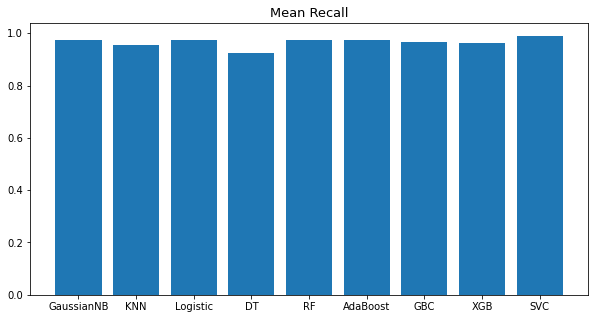

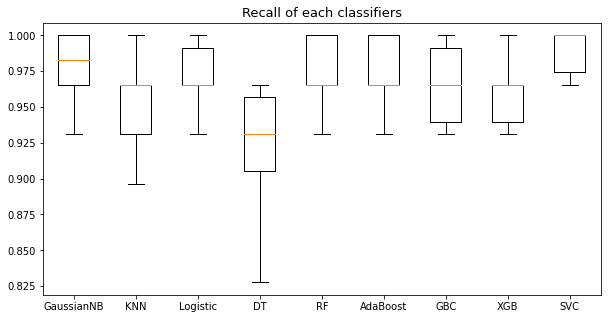

In [ ]:
# 분류 모델별 recall 값의 평균을 막대 그래프로 출력
plt.figure(figsize = (10, 5))
plt.bar(model_names, model_recall_means)
plt.title('Mean Recall', size = 13)
plt.show()

# 분류 모델별 결과를 Box plot으로 출력
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
ax.boxplot(model_recalls)
ax.set_xticklabels(model_names)
plt.title('Recall of each classifiers', size = 13)
plt.show()

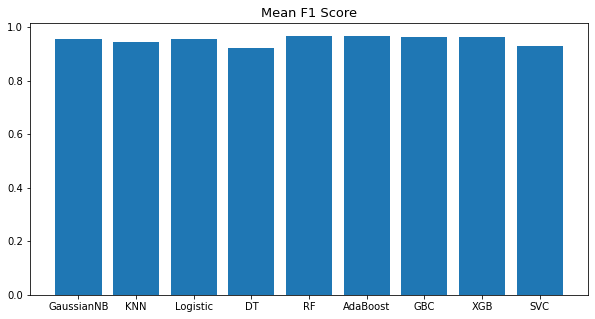

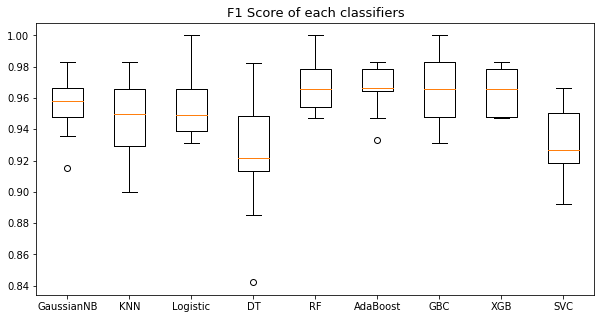

In [ ]:
# 분류 모델별 f1 값의 평균을 막대 그래프로 출력
plt.figure(figsize = (10, 5))
plt.bar(model_names, model_f1_means)
plt.title('Mean F1 Score', size = 13)
plt.show()

# 분류 모델별 결과를 Box plot으로 출력
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
ax.boxplot(model_f1)
ax.set_xticklabels(model_names)
plt.title('F1 Score of each classifiers', size = 13)
plt.show()

## **9. Imbalanced Data Problem**

* 가상 데이터 생성

Original Data: (0: 449, 1: 51)


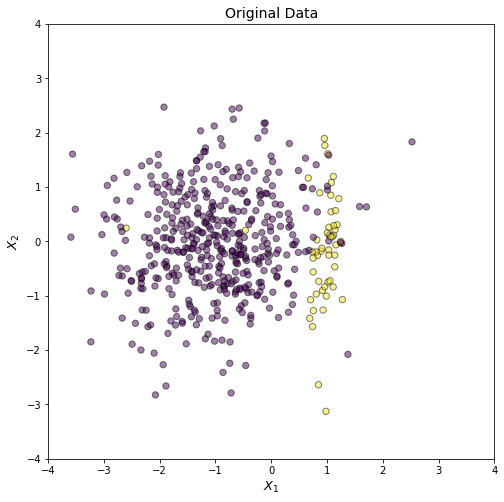

In [ ]:
from sklearn.datasets import make_classification
from collections import Counter

# 가상 데이터 생성, feature는 2개, target의 비율이 9:1인 불균형한 binary 데이터
X, y = make_classification(n_samples = 500,
                           n_features = 2,
                           n_informative = 1,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           random_state = 6,
                           weights = [0.9, 0.1]
                           )

# target 개수 출력
print(f'Original Data: (0: {Counter(y)[0]}, 1: {Counter(y)[1]})')

# Scatter Plot으로 시각화
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1],
            marker='o',
            c = y,
            s = 40,
            alpha=0.5,
            edgecolor = "k",
            #linewidth = 1
            )

plt.title('Original Data', size = 14)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$X_1$", size = 13)
plt.ylabel("$X_2$", size = 13)
plt.show()

### --> Undersampling

In [ ]:
# imbalanced learn package 설치
! pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, ADASYN
from imblearn.over_sampling import SMOTE

from importlib import reload
reload(plt)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

#### Random Sampling / Tomek links

Random Sampling: (0: 51, 1: 51)


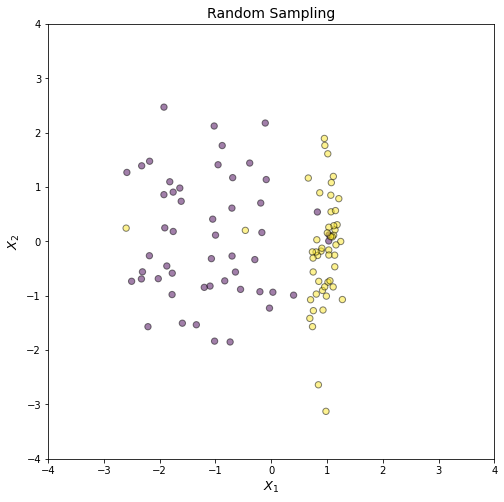

In [ ]:
# sampling_strategy는 auto로 자동 설정
undersample = RandomUnderSampler(sampling_strategy = 'auto')
X_random, y_random = undersample.fit_resample(X, y) # under sampling 진행

print(f'Random Sampling: (0: {Counter(y_random)[0]}, 1: {Counter(y_random)[1]})') # 결과 출력

plt.figure(figsize = (8, 8))
plt.scatter(X_random[:, 0], X_random[:, 1],
            marker='o',
            c = y_random,
            s = 40,
            alpha=0.5,
            edgecolor = "k",
            #linewidth = 1
            )

plt.title('Random Sampling', size = 14)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$X_1$", size = 13)
plt.ylabel("$X_2$", size = 13)
plt.show()

Tomek Links: (0: 446, 1: 51)


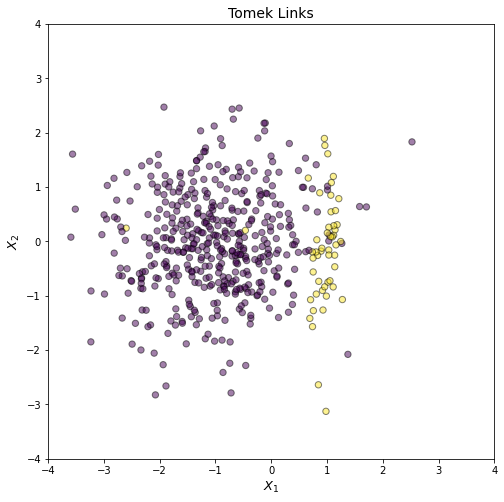

In [ ]:
# sampling_strategy는 auto로 자동 설정
tomek_sample = TomekLinks(sampling_strategy = 'auto')
X_tom, y_tom = tomek_sample.fit_resample(X, y) # Tomek Links sampling 진행
print(f'Tomek Links: (0: {Counter(y_tom)[0]}, 1: {Counter(y_tom)[1]})') # 결과 출력

plt.figure(figsize = (8, 8))
plt.scatter(X_tom[:, 0], X_tom[:, 1],
          marker='o',
            c = y_tom,
            s = 40,
            alpha=0.5,
            edgecolor = "k",
            #linewidth = 1
            )

plt.title('Tomek Links', size = 14)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$X_1$", size = 13)
plt.ylabel("$X_2$", size = 13)
plt.show()

###  --> Oversampling

####Resampling / SMOTE / ADASYN

Resampling: (0: 449, 1: 449)


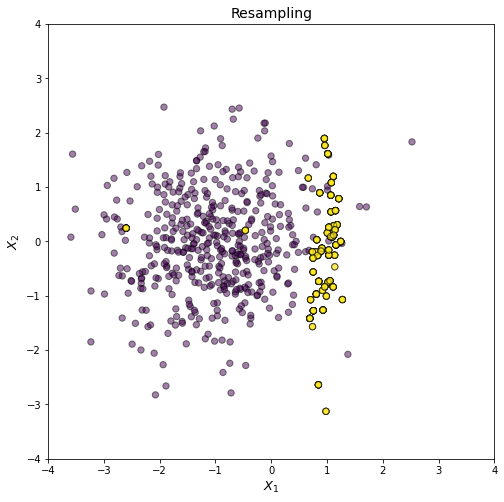

In [ ]:
# sampling_strategy는 auto로 자동 설정
resample = RandomOverSampler(sampling_strategy = 'auto')
X_over, y_over = resample.fit_resample(X, y) # Resampling 진행
print(f'Resampling: (0: {Counter(y_over)[0]}, 1: {Counter(y_over)[1]})') # 결과 출력

plt.figure(figsize = (8, 8))
plt.scatter(X_over[:, 0], X_over[:, 1],
            marker = 'o',
            c = y_over,
            s = 40,
            alpha=0.5,
            edgecolor = "k",
            #linewidth = 1
            )

plt.title('Resampling', size = 14)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$X_1$", size = 13)
plt.ylabel("$X_2$", size = 13)
plt.show()

SMOTE: (0: 449, 1: 449)


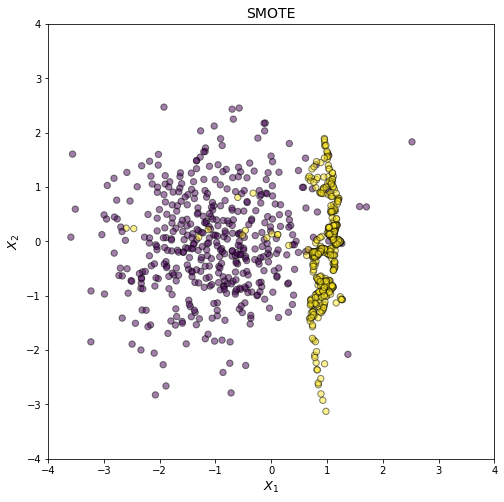

In [ ]:
# sampling_strategy는 auto로 자동 설정
smote_sample = SMOTE(sampling_strategy = 'auto')
X_sm, y_sm = smote_sample.fit_resample(X, y) # SMOTE sampling 진행
print(f'SMOTE: (0: {Counter(y_sm)[0]}, 1: {Counter(y_sm)[1]})') # 결과 출력

plt.figure(figsize = (8, 8))

plt.scatter(X_sm[:, 0], X_sm[:, 1],
            marker = 'o',
            c = y_sm,
            s = 40,
            alpha=0.5,
            edgecolor = "k",
            #linewidth = 1
            )

plt.title('SMOTE', size = 14)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$X_1$", size = 13)
plt.ylabel("$X_2$", size = 13)
plt.show()

ADASYN: (0: 449, 1: 445)


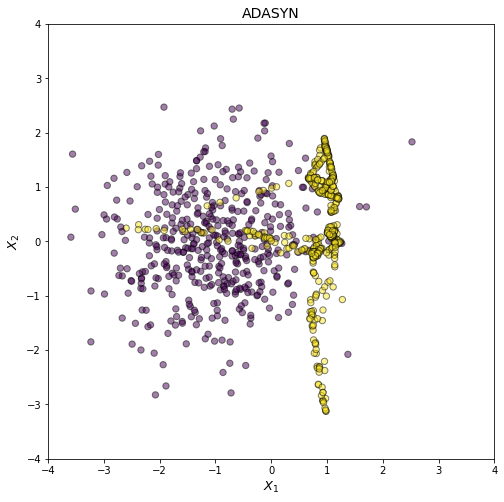

In [ ]:
# sampling_strategy는 auto로 자동 설정
adaysn_sample = ADASYN(sampling_strategy = 'auto')
X_ada, y_ada = adaysn_sample.fit_resample(X, y)
print(f'ADASYN: (0: {Counter(y_ada)[0]}, 1: {Counter(y_ada)[1]})') # 결과 출력

plt.figure(figsize = (8, 8))

plt.scatter(X_ada[:, 0], X_ada[:, 1],
            marker = 'o',
            c = y_ada,
            s = 40,
            alpha=0.5,
            edgecolor = "k",
            #linewidth = 1
            )

plt.title('ADASYN', size = 14)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$X_1$", size = 13)
plt.ylabel("$X_2$", size = 13)
plt.show()

* Sampling 결과 시각화

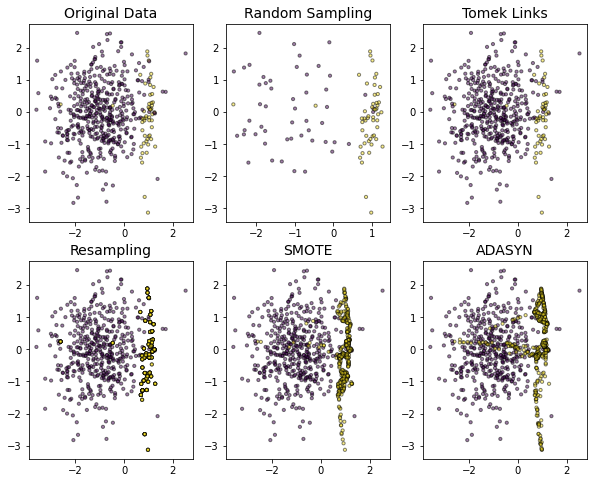

In [ ]:
# Sampling 결과가 저장된 Dict 생성
result_dict = {
    "Original Data" : [X, y],
    "Random Sampling" : [X_random, y_random],
    "Tomek Links": [X_tom, y_tom],
    "Resampling" : [X_over, y_over],
    "SMOTE" : [X_sm, y_sm],
    "ADASYN" : [X_ada, y_ada],
}

fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = False)
fig.set_size_inches((10, 8))

for i, name in enumerate(result_dict):
  j = (1 if i > 2 else 0)
  i = (i - 3 if i > 2 else i)
  X_temp, y_temp = result_dict[name]
  axes[j, i].scatter(X_temp[:, 0],
                     X_temp[:, 1],
                     marker = 'o',
                     c = y_temp,
                     s = 10,
                     alpha=0.5,
                     edgecolor = "k",
                     #linewidth = 1
            )
  
  axes[j, i].set_title(name, size = 14)

plt.show()

# **Chap 5. 비지도학습**

## **1. Feature Extraction** (Dimension Reduction)

###  --> Unsupervised feature extraction (PCA, SVD, MDS, Isomap, LLE, t-SNE)

In [ ]:
import math
from collections import defaultdict

import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.datasets import make_swiss_roll, make_blobs

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import IsolationForest

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline

# 경고무시
import warnings
warnings.filterwarnings("ignore")

#### Dataset: Iris

In [ ]:
# 사이킷런의 내장된 IRIS 데이터 불러오기
iris = datasets.load_iris()
X = iris.data
y = iris.target

# StandardScaler로 Normalization
scaler = StandardScaler() # StandardScaler 정의
result = scaler.fit_transform(X) # fit_transform
X_scaled = pd.DataFrame(result, columns=iris.feature_names) # DataFrame 생성
X_scaled

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.900681          1.019004          -1.340227         -1.315444
1            -1.143017         -0.131979          -1.340227         -1.315444
2            -1.385353          0.328414          -1.397064         -1.315444
3            -1.506521          0.098217          -1.283389         -1.315444
4            -1.021849          1.249201          -1.340227         -1.315444
..                 ...               ...                ...               ...
145           1.038005         -0.131979           0.819596          1.448832
146           0.553333         -1.282963           0.705921          0.922303
147           0.795669         -0.131979           0.819596          1.053935
148           0.432165          0.788808           0.933271          1.448832
149           0.068662         -0.131979           0.762758          0.790671

[150 rows x 4 columns]

In [ ]:
# 통계 확인
X_scaled.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15      -1.610564e-15   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-01     -5.923730e-01      -1.226552e+00   
50%        -5.250608e-02     -1.319795e-01       3.364776e-01   
75%         6.745011e-01      5.586108e-01       7.627583e-01   
max         2.492019e+00      3.090775e+00       1.785832e+00   

       petal width (cm)  
count      1.500000e+02  
mean      -9.473903e-16  
std        1.003350e+00  
min       -1.447076e+00  
25%       -1.183812e+00  
50%        1.325097e-01  
75%        7.906707e-01  
max        1.712096e+00

In [ ]:
, TruncatedSVD
# 모델이 저장된 dict 생성
dim_reduction_dict = {
    'PCA' : PCA(n_components = 2, random_state = 0),
    'SVD' : TruncatedSVD(n_components = 2, random_state = 0),
    'MDS' : MDS(n_components = 2, random_state = 0),
    'ISOMAP' : Isomap(n_components = 2),
    'LLE' : LocallyLinearEmbedding(n_components=2, random_state = 0),
    'TSNE' : TSNE(n_components=2, random_state = 0),
}

# 결과를 저장할 dict
dim_reduction_result_dict = defaultdict()

for model_name, model in dim_reduction_dict.items():
  # 차원 축소 후 결과를 데이터 프레임으로 저장
  dim_reduction_result = model.fit_transform(X_scaled)
  dim_reduction_result = pd.DataFrame(dim_reduction_result,
                                        columns = ["X1", "X2"])
  
  # 시각화를 위해 class column 추가
  target = pd.DataFrame(iris.target, columns=['type'])
  target['type'] = target['type'].apply(lambda x: iris.target_names[x])
  merged_result = pd.concat([dim_reduction_result, target], axis=1)

  # dict에 저장
  dim_reduction_result_dict[model_name] = merged_result

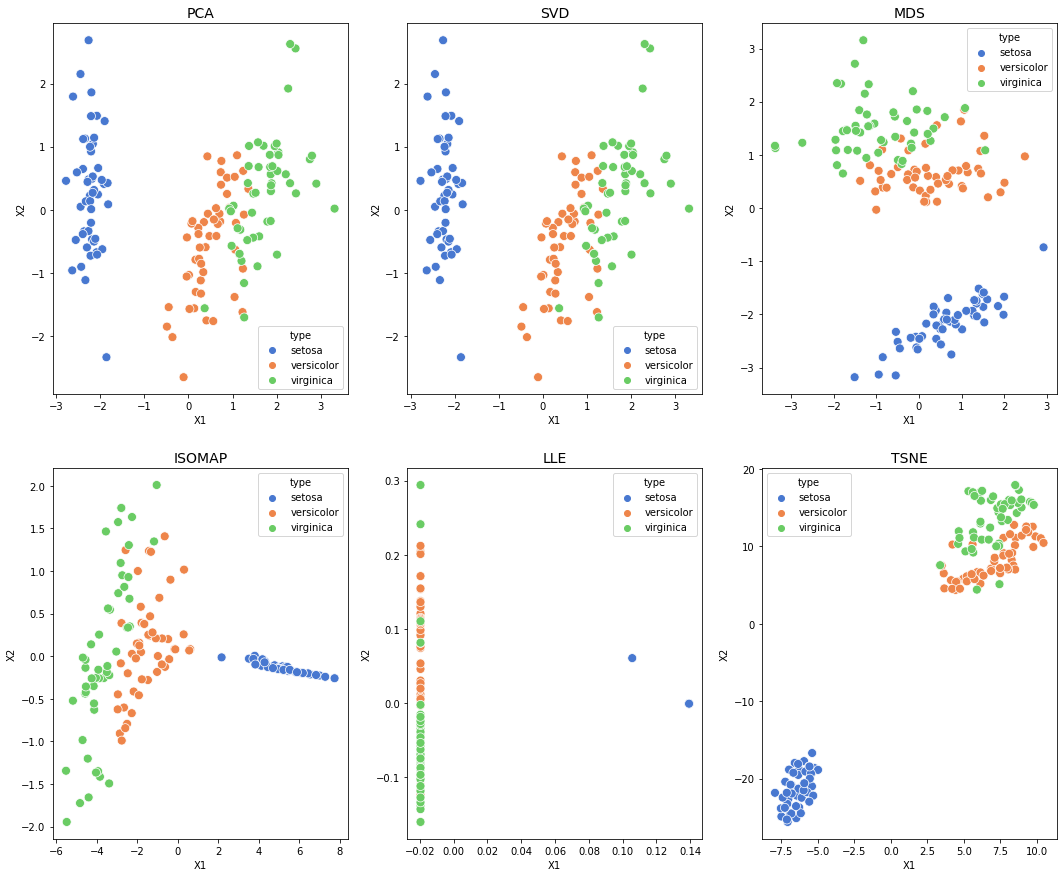

In [ ]:
# 시각화
fig, ax = plt.subplots(nrows = 2, ncols = 3)
fig.set_size_inches((18, 15))

for i, model_name in enumerate(dim_reduction_result_dict):
  j = (1 if i > 2 else 0)
  i = (i - 3 if i > 2 else i)

  result_df = dim_reduction_result_dict[model_name]
  
  sns.set_palette(sns.color_palette("muted"))
  sns.scatterplot(result_df['X1'],
                  result_df['X2'],
                  hue = result_df['type'],
                  s=80,
                  palette = sns.color_palette('muted', n_colors=3),
                  ax = ax[j, i]
                  )
  ax[j, i].set_title(model_name, size = 14)

plt.show()

#### Dataset: Swiss Roll 

In [ ]:
# Swiss Roll Data 생성
X, t = make_swiss_roll(n_samples=1000, noise=0.05, random_state = 0)

In [ ]:
print(X)
print(t)

[[ -8.86233186  12.48684443  -4.37383917]
 [  5.12529365   0.20939234 -10.17047168]
 [ -5.97075967   9.99012014  -8.49393729]
 ...
 [  7.44543525  10.11446403  11.31999333]
 [  5.69562603  13.43035033   3.86059158]
 [  1.11714686  10.57479072 -11.06798417]]
[ 9.8848344  11.45288996 10.39329996  9.84779199  8.7052414  10.79979758
  8.83655129 13.1171515  13.79469653  8.32624016 12.17422167  9.69710616
 10.06608284 13.43593178  5.38188806  5.53356328  4.90294289 12.55964615
 12.04634358 12.9120603  13.93564956 12.244281    9.0617295  12.06870316
  5.82709918 10.74350252  6.06346188 13.61568377  9.63069354  8.62048569
  7.20576688 12.00936959  9.01150458 10.06975273  4.88947868 10.5334664
 10.48125526 10.52685492 13.60700507 11.13839391  8.10067112  8.83131811
 11.2874081   5.28000068 10.99651723 11.03300199  6.69519791  5.92749071
  7.68523115  8.14028224 10.08636694  8.84611086 14.02759295  5.67413866
  6.68100603  6.23269537 10.86778993  7.09960609  9.10726448  7.01604591
  6.21064201 

In [ ]:
## PCA와 SVD의 비교를 위해 mean-centered data로 만들기

## StandardScaler로 Normalization
#scaler = StandardScaler() # StandardScaler 정의
#X = scaler.fit_transform(X) # fit_transform

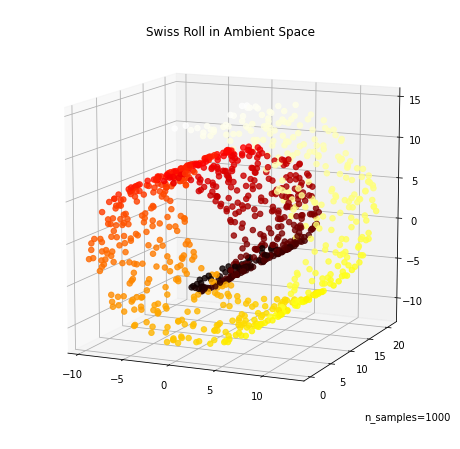

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    X[:, 0], X[:, 1], X[:, 2], c=t, cmap = plt.cm.hot, s=30, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1000", transform=ax.transAxes)

In [ ]:
# 모델이 저장된 dict 생성
dim_reduction_dict = {
    'PCA' : PCA(n_components = 2, random_state = 42),
    'SVD' : TruncatedSVD(n_components = 2, random_state = 42),
    'MDS' : MDS(n_components = 2, random_state = 42),
    'ISOMAP' : Isomap(n_components = 2),
    'LLE' : LocallyLinearEmbedding(n_components=2,
                                   n_neighbors = 10,
                                   random_state = 42),
    'TSNE' : TSNE(n_components=2, random_state = 42),
}

# 결과를 저장할 dict
dim_reduction_result_dict = defaultdict()

for model_name, model in dim_reduction_dict.items():
  # 차원 축소 후 결과를 저장
  dim_reduction_result = model.fit_transform(X)

  # dict에 저장
  dim_reduction_result_dict[model_name] = dim_reduction_result

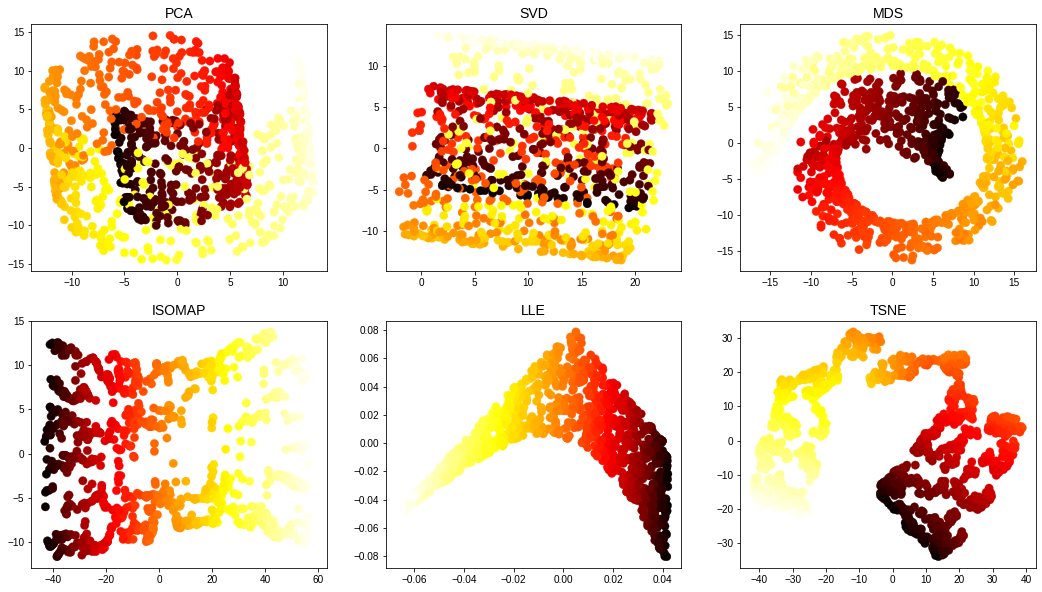

In [ ]:
# 시각화
fig, ax = plt.subplots(nrows = 2, ncols = 3)
fig.set_size_inches((18, 10))

for i, model_name in enumerate(dim_reduction_result_dict):
  j = (1 if i > 2 else 0)
  i = (i - 3 if i > 2 else i)
  
  X_temp = dim_reduction_result_dict[model_name]
  
  plt.style.use('seaborn')
  ax[j, i].scatter(X_temp[:, 0],
                   X_temp[:, 1],
                   c = t,
                   cmap = plt.cm.hot,
                   s = 70,
                   )
  
  ax[j, i].set_title(model_name, size = 14)

plt.show()

###  --> Supervised feature extraction (LDA, PLS)


#### Dataset: Iris (for LDA)

In [ ]:
# LDA 2차원 축소  (iris data)
lda = LinearDiscriminantAnalysis(n_components=2)
lda_result = lda.fit_transform(X_scaled, y) # fit_transform
lda_result = pd.DataFrame(lda_result, columns=["X1", "X2"])
lda_result

X1        X2
0    8.061800  0.300421
1    7.128688 -0.786660
2    7.489828 -0.265384
3    6.813201 -0.670631
4    8.132309  0.514463
..        ...       ...
145 -5.645003  1.677717
146 -5.179565 -0.363475
147 -4.967741  0.821141
148 -5.886145  2.345091
149 -4.683154  0.332034

[150 rows x 2 columns]

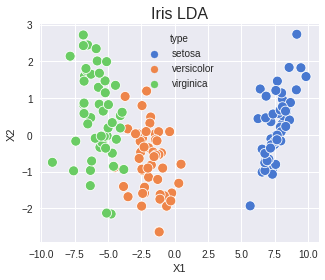

In [ ]:
# 시각화를 위해 class column 추가
target = pd.DataFrame(iris.target, columns=['type'])
target['type'] = target['type'].apply(lambda x: iris.target_names[x])
lda_merged = pd.concat([lda_result, target], axis=1)

# LDA 결과 시각화
plt.figure(figsize=(5, 4))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(lda_merged['X1'],
                lda_merged['X2'],
                hue = lda_merged['type'],
                s=100,
                palette = sns.color_palette('muted', n_colors=3),
                )

plt.title('Iris LDA', size = 16)
plt.show()

#### Dataset: Boston housing price (for PLS)

In [ ]:
# boston 데이터셋 불러오기
boston = datasets.load_boston()

# DataFrame 생성
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target

# Train Test 데이터 분리
y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    )

In [ ]:
# PLS 2차원 축소
pls = PLSRegression(n_components = 2)

pls_result = pls.fit_transform(X_train, y_train)
pls_result = pd.DataFrame(pls_result[0], columns=["X1", "X2"])
pls_result

X1        X2
0   -1.419877  1.952458
1   -1.060199 -1.405058
2   -2.169973 -0.253390
3   -1.137635 -0.416760
4    4.756822 -0.705040
..        ...       ...
399 -0.219452 -1.205049
400 -3.340604  0.491467
401 -0.027809  0.172048
402 -0.495151 -1.312172
403 -0.228997 -0.457075

[404 rows x 2 columns]

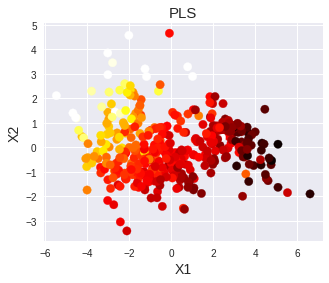

In [ ]:
plt.figure(figsize = (5, 4))
plt.scatter(pls_result['X1'],
            pls_result['X2'],
            c = y_train,
            cmap = plt.cm.hot,
            s = 70)

plt.title("PLS", size = 15)
plt.xlabel("X1", size = 14)
plt.ylabel("X2", size = 14)
plt.show()

## **2. Clustering**


###  --> Hierarchical clustering / K-means / K-medoids / GMM / DBSCAN

In [ ]:
!pip install scikit-learn-extra
# for k-medoids

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 32.2 MB/s 


In [ ]:
import math
from collections import defaultdict

import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.datasets import make_swiss_roll, make_blobs

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import IsolationForest

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, ward

%matplotlib inline

# 경고무시
import warnings
warnings.filterwarnings("ignore")

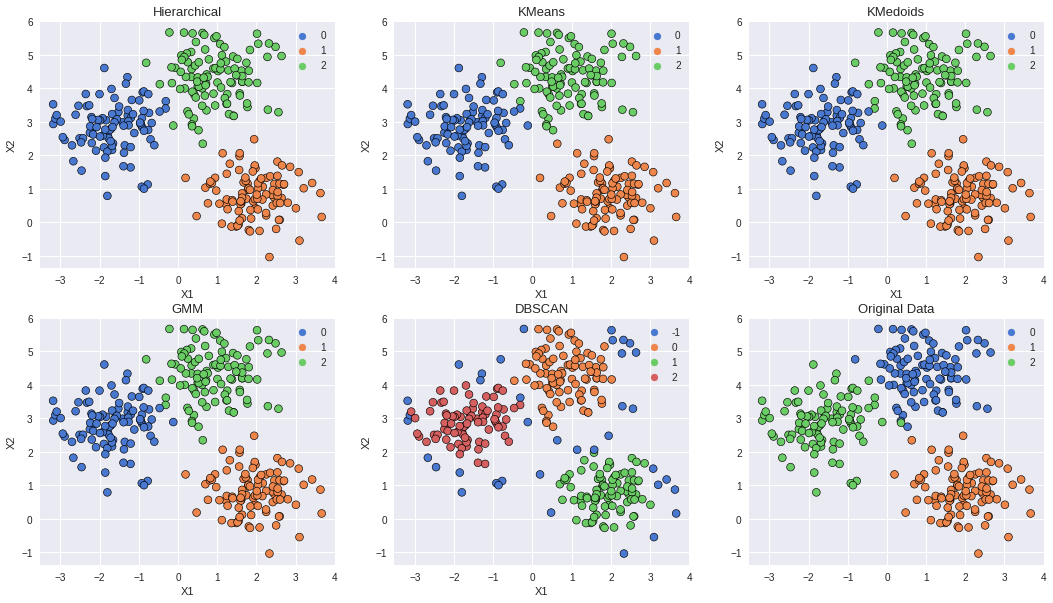

In [ ]:
# 4개의 군집으로 군집화
# 군집화 모델이 저장된 dict 생성
cluster_model_dict = {
    'Hierarchical' : AgglomerativeClustering(n_clusters = 3,affinity='euclidean',linkage='ward'),
    'KMeans' : KMeans(n_clusters = 3, max_iter = 200, random_state = 0),
    'KMedoids' : KMedoids(n_clusters = 3, max_iter = 200, random_state = 0),
    'GMM' : GaussianMixture(n_components = 3, random_state = 0),
    'DBSCAN' : DBSCAN(eps=0.5, min_samples=8, metric='euclidean'),
}


fig, ax = plt.subplots(nrows = 2, ncols = 3)
fig.set_size_inches((18, 10))

for i, model_name in enumerate(cluster_model_dict):
  j = (1 if i > 2 else 0)
  i = (i - 3 if i > 2 else i)

  # 군집을 위한 데이터 생성
  X, y = make_blobs(
      n_samples = 300,
      n_features = 2,
      centers = 3,
      cluster_std = 0.7,
      center_box=(-10.0, 10.0),
      shuffle = True,
      random_state = 0)
  
  cluster_df = pd.DataFrame(data=X, columns=['X1', 'X2'])
  cluster_df['Traget'] = y

  # cluster 정의
  cluster = cluster_model_dict[model_name]
  
  # clustering label 저장
  cluster_labels = cluster.fit_predict(X)
  len_cluster_labels = len(set(cluster_labels))
  cluster_df[f'{model_name}_label']  = cluster_labels

  # clustering 결과 시각화
  sns.set_palette(sns.color_palette("muted"))

  sns.scatterplot(cluster_df['X1'],
                  cluster_df['X2'],
                  hue = cluster_labels,
                  s = 60,
                  palette = sns.color_palette('muted', n_colors = len_cluster_labels),
                  edgecolor = 'k',
                  ax = ax[j, i]
                  )
  
  ax[j, i].set_title(model_name, size = 13)


# original Data 추가
sns.scatterplot(X[:, 0],
                X[:, 1],
                hue = y,
                s = 60,
                palette = sns.color_palette('muted', n_colors = 3),
                edgecolor = 'k',
                ax = ax[1, 2])

ax[1, 2].set_title('Original Data', size = 13)

plt.show()





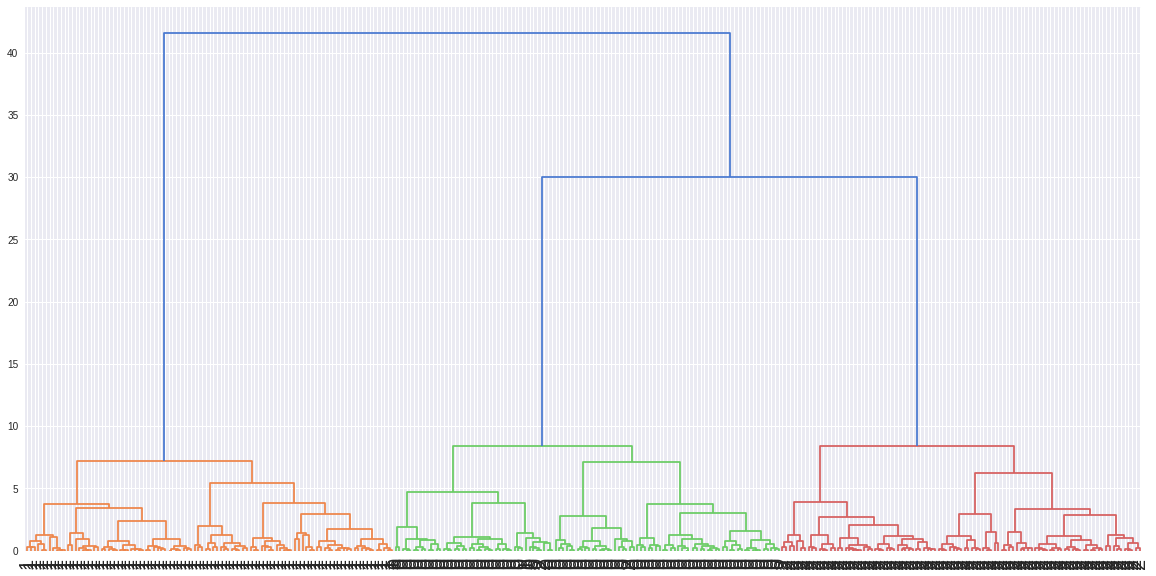

In [ ]:
# 덴드로그램
# 위에서 사용한 동일한 데이터를 다시 생성
X, y = make_blobs(
      n_samples = 300,
      n_features = 2,
      centers = 3,
      cluster_std = 0.7,
      center_box=(-10.0, 10.0),
      shuffle = True,
      random_state = 0)

# 거리 정보가 담긴 배열을 저장후 시각화

# Calculate the linkage: mergings
mergings = ward(X)

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(20,10))
dendrogram(mergings,
           labels = y,
           leaf_rotation=90,
           leaf_font_size=20,
)

plt.show()

###  --> Clustering validity measure


#### Silhouette statistic

In [ ]:
  # 군집의 개수가 3개인 데이터 생성
  X, y = make_blobs(
      n_samples = 1000,
      n_features = 2,
      centers = 3,
      cluster_std = 0.7,
      center_box=(-10.0, 10.0),
      shuffle = True,
      random_state = 0)

In [ ]:
def visualize_silhouette(cluster_lists, X_features):
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

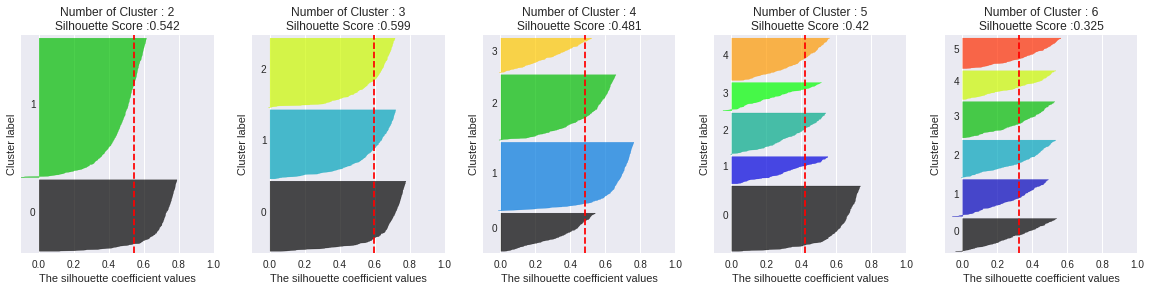

In [ ]:
visualize_silhouette([2, 3, 4, 5, 6], X)

# **Chap 6. Anomaly Detection**

##  --> **Isolation Forest**

In [ ]:
# randomstate 설정
rng = np.random.RandomState(0)

# train 데이터 생성
# 평균 0, 표준편차 1의 가우시안 표준정규분포 난수를 100 by 2의 matrix array로 생성
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2] # X + 2, X - 2 array를 옆으로 붙이기

# test 데이터 생성
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# outlier 데이터 생성
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# IsolationForest 모델 훈련
clf = IsolationForest(max_samples=100,
                      random_state=rng)

clf.fit(X_train) # fit
y_pred_train = clf.predict(X_train) # predict X_train
y_pred_test = clf.predict(X_test) # predict X_test
y_pred_outliers = clf.predict(X_outliers) # predict X_outliers

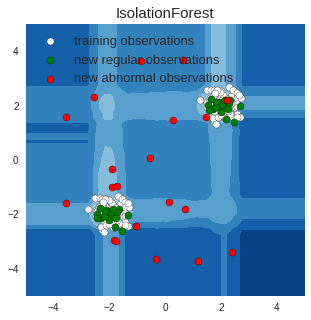

In [ ]:
# 시각화
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize = (5,5))
plt.title("IsolationForest", size = 15)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=50, edgecolor="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="green", s=50, edgecolor="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", s=50, edgecolor="k")

plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [b1, b2, c],
    ["training observations", "new regular observations", "new abnormal observations"],
    fontsize = 13,
    loc = 'upper left',
)

plt.show()

# **Chap 7. Deep Learning**

## **0. DL for ThoraricSurgery dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* 1.환경 준비 

In [ ]:
from tensorflow.keras.models import Sequential  # 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.layers import Dense       # 데이터를 다루는 데 필요한 라이브러리를 불러옵니다.
import numpy as np

* 2.데이터 준비

In [ ]:
Data_set = np.loadtxt("/content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/ThoraricSurgery3.csv", delimiter=",")  # 수술 환자 데이터를 불러옵니다.
X = Data_set[:,0:16]                                                 # 환자의 진찰 기록을 X로 지정합니다.
y = Data_set[:,16]                                                   # 수술 후 사망/생존 여부를 y로 지정합니다.

* 3.구조 결정 

In [ ]:
model = Sequential()                                                  # 딥러닝 모델의 구조를 결정합니다.
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

* 4.모델 실행 

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # 딥러닝 모델을 실행합니다.
history=model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 [==============================] - 3s 3ms/step - loss: 1.6500 - accuracy: 0.8511
Epoch 2/5
30/30 [==============================] - 0s 3ms/step - loss: 0.5839 - accuracy: 0.8511
Epoch 3/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.8511
Epoch 4/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4210 - accuracy: 0.8511
Epoch 5/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4222 - accuracy: 0.8511


## **0. Multiple Linear Regression** 
1).   Python coding for Gradient Descent  
2).   TensorFlow



###  --> Python coding for Gradient Descent

* 1.환경 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

* 2.데이터 준비

In [ ]:
# 공부 시간 x1과 과외 시간 x2, 그 성적 y의 넘파이 배열을 만듭니다. 
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97]) 

* 3.데이터 분포 확인

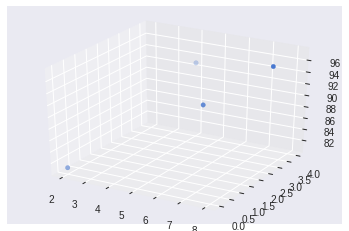

In [ ]:
# 데이터의 분포를 그래프로 나타냅니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y);
plt.show()

* 4.실행을 위한 변수 설정

In [ ]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a1 = 0
a2 = 0
b = 0

# 학습률을 정합니다.
lr = 0.01 

# 몇 번 반복될지 설정합니다.
epochs = 2001 

* 5.경사 하강법

In [ ]:
# x 값이 총 몇 개인지 셉니다. x1과 x2의 수가 같으므로 x1만 세겠습니다. 
n=len(x1)

# 경사 하강법을 시작합니다.
for i in range(epochs):                  # 에포크 수 만큼 반복
    
    y_pred = a1 * x1 + a2 * x2 + b       # 예측 값을 구하는 식을 세웁니다
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.
    
    a1_diff = (2/n) * sum(-x1 * (error)) # 오차 함수를 a1로 편미분한 값입니다. 
    a2_diff = (2/n) * sum(-x2 * (error)) # 오차 함수를 a2로 편미분한 값입니다. 
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다. 
    
    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a1, a2, b 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))        

epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [ ]:
# 실제 점수와 예측된 점수를 출력합니다.
print("실제 점수:", y)
print("예측 점수:", y_pred)

실제 점수: [81 93 91 97]
예측 점수: [80.76387645 92.97153922 91.42520875 96.7558749 ]


###  --> TensorFlow 

* 1.환경 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

* 2.데이터 준비

In [ ]:
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97]) 

* 3.모델 실행

In [ ]:
model = Sequential()

# 입력 변수가 2개(학습 시간, 과외 시간)이므로 input_dim에 2를 입력합니다. 
model.add(Dense(1, input_dim=2, activation='linear'))
model.compile(optimizer='sgd' ,loss='mse')

model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 218ms/step - loss: 8106.1494
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 1432.6732
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 957.7725
Epoch 4/2000
1/1 [==============================] - 0s 6ms/step - loss: 918.8563
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 910.6423
Epoch 6/2000
1/1 [==============================] - 0s 6ms/step - loss: 904.6268
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 898.8046
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 893.0340
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 887.3048
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 881.6158
Epoch 11/2000
1/1 [==============================] - 0s 7ms/step - loss: 875.9667
Epoch 12/2000
1/1 [==============================] - 0s 17ms/step - loss: 870.3566
Epoch 13/2000
1/1 [

* 4.모델 테스트

In [ ]:
# 임의의 학습 시간과 과외 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.

hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])

print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))

1/1 [==============================] - 0s 280ms/step
7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다


## **0. Logistic Regression**


1).   Python coding for Gradient Descent  
2).   TensorFlow



###  --> Python coding for Gradient Descent

In [ ]:
data = [[2, 0],
        [4, 0],
        [6, 0],
        [8, 1],
        [10, 1],
        [12, 1],
        [14, 1]]

x_data = [i[0] for i in data]  #공부한 시간 데이터
y_data = [i[1] for i in data] 

print(x_data)
print(y_data)

[2, 4, 6, 8, 10, 12, 14]
[0, 0, 0, 1, 1, 1, 1]


(-0.1, 1.1)

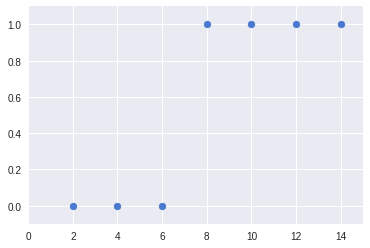

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

In [ ]:
a = 0
b = 0

lr = 0.05  # 학습률

In [ ]:
import numpy as np

def sigmoid(x):
  return 1/(1+np.e**(-x))

In [ ]:
for i in range(2001):
  for (x, y) in data:
    a_diff = -(y - sigmoid(a*x +b))*sigmoid(a*x +b)*(1-sigmoid(a*x +b))*x
    b_diff = -(y - sigmoid(a*x +b))*sigmoid(a*x +b)*(1-sigmoid(a*x +b))
    a = a - lr*a_diff
    b = b - lr*b_diff

    if i % 1000 == 0:
      print("epoch=%.f, a=%.04f, b=%.04f" % (i, a, b))

epoch=0, a=-0.0125, b=-0.0063
epoch=0, a=-0.0368, b=-0.0123
epoch=0, a=-0.0695, b=-0.0178
epoch=0, a=-0.0105, b=-0.0104
epoch=0, a=0.0554, b=-0.0038
epoch=0, a=0.1013, b=0.0000
epoch=0, a=0.1227, b=0.0015
epoch=1000, a=0.6632, b=-4.3335
epoch=1000, a=0.6590, b=-4.3345
epoch=1000, a=0.6296, b=-4.3394
epoch=1000, a=0.6591, b=-4.3357
epoch=1000, a=0.6632, b=-4.3353
epoch=1000, a=0.6636, b=-4.3353
epoch=1000, a=0.6636, b=-4.3353
epoch=2000, a=0.8646, b=-5.8088
epoch=2000, a=0.8632, b=-5.8092
epoch=2000, a=0.8396, b=-5.8131
epoch=2000, a=0.8632, b=-5.8101
epoch=2000, a=0.8647, b=-5.8100
epoch=2000, a=0.8648, b=-5.8100
epoch=2000, a=0.8648, b=-5.8100


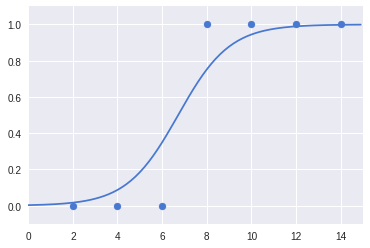

In [ ]:
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

x_range = (np.arange(0, 15, 0.1))
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x + b) for x in x_range]))
plt.show()

###  --> TensorFlow

* 1.환경 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

* 2.데이터 준비

In [ ]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1]) 

* 3.모델 실행

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# 교차 엔트로피 오차 함수를 이용하기 위하여 'binary_crossentropy'로 설정합니다. 
model.compile(optimizer='sgd' ,loss='binary_crossentropy')
model.fit(x, y, epochs=5000)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 5ms/step - loss: 0.2625
Epoch 2467/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2624
Epoch 2468/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2624
Epoch 2469/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2623
Epoch 2470/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2623
Epoch 2471/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2623
Epoch 2472/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2622
Epoch 2473/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2622
Epoch 2474/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2621
Epoch 2475/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2621
Epoch 2476/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2620
Epoch 2477/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2

* 4.모델 테스트

1/1 [==============================] - 0s 83ms/step


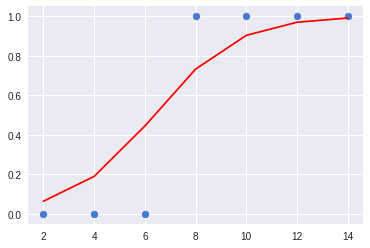

In [ ]:
# 그래프로 확인해 봅니다.

plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')
plt.show()

In [ ]:
# 임의의 학습 시간을 집어넣어 합격 예상 확률을 예측해 보겠습니다.

hour = 7
prediction = model.predict([hour])

print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다" % (hour, prediction * 100))

1/1 [==============================] - 0s 37ms/step
7시간을 공부할 경우, 합격 예상 확률은 59.7%입니다


## **2. Multi-layer Perceptron (for XOR problem)**

In [ ]:
import numpy as np

# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1

# NAND 게이트
def NAND(x1,x2):
    return MLP(np.array([x1, x2]), w11, b1)

# OR 게이트
def OR(x1,x2):
    return MLP(np.array([x1, x2]), w12, b2)

# AND 게이트
def AND(x1,x2):
    return MLP(np.array([x1, x2]), w2, b3)

# XOR 게이트
def XOR(x1,x2):
    return AND(NAND(x1, x2),OR(x1,x2))


# x1, x2 값을 번갈아 대입해 가며 최종 값 출력
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(x[0], x[1])
    print("입력 값: " + str(x) + " 출력 값: " + str(y))      

입력 값: (0, 0) 출력 값: 0
입력 값: (1, 0) 출력 값: 1
입력 값: (0, 1) 출력 값: 1
입력 값: (1, 1) 출력 값: 0


## **4. DL Model Desing (Binary classification)** 
* Dataset: Pima Indians Diabetes

###  --> Pandas를 활용한 데이터 조사

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 피마 인디언 당뇨병 데이터셋을 불러옵니다. 
df = pd.read_csv('/content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/pima-indians-diabetes3.csv')

In [ ]:
# 처음 5줄을 봅니다.
df.head(5)

pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  age  \
0         6     148        72         35        0  33.6     0.627   50   
1         1      85        66         29        0  26.6     0.351   31   
2         8     183        64          0        0  23.3     0.672   32   
3         1      89        66         23       94  28.1     0.167   21   
4         0     137        40         35      168  43.1     2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1

In [ ]:
# 정상과 당뇨 환자가 각각 몇 명씩인지 조사해 봅니다.
df["diabetes"].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# 각 정보별 특징을 좀 더 자세히 출력합니다.
df.describe()

pregnant      plasma    pressure   thickness     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age    diabetes  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

In [ ]:
# 각 항목이 어느 정도의 상관 관계를 가지고 있는지 알아봅니다. 
df.corr()

pregnant    plasma  pressure  thickness   insulin       bmi  \
pregnant   1.000000  0.129459  0.141282  -0.081672 -0.073535  0.017683   
plasma     0.129459  1.000000  0.152590   0.057328  0.331357  0.221071   
pressure   0.141282  0.152590  1.000000   0.207371  0.088933  0.281805   
thickness -0.081672  0.057328  0.207371   1.000000  0.436783  0.392573   
insulin   -0.073535  0.331357  0.088933   0.436783  1.000000  0.197859   
bmi        0.017683  0.221071  0.281805   0.392573  0.197859  1.000000   
pedigree  -0.033523  0.137337  0.041265   0.183928  0.185071  0.140647   
age        0.544341  0.263514  0.239528  -0.113970 -0.042163  0.036242   
diabetes   0.221898  0.466581  0.065068   0.074752  0.130548  0.292695   

           pedigree       age  diabetes  
pregnant  -0.033523  0.544341  0.221898  
plasma     0.137337  0.263514  0.466581  
pressure   0.041265  0.239528  0.065068  
thickness  0.183928 -0.113970  0.074752  
insulin    0.185071 -0.042163  0.130548  
bmi        0.140647  0.036242  0.292695  
pedigree   1.000000  0.033561  0.173844  
age        0.033561  1.000000  0.238356  
diabetes   0.173844  0.238356  1.000000

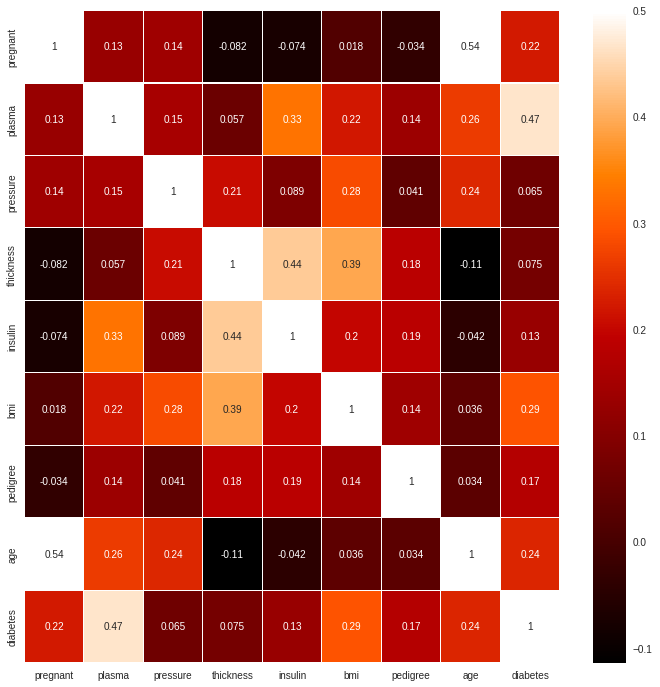

In [ ]:
# 데이터 간의 상관 관계를 그래프로 표현해 봅니다.
colormap = plt.cm.gist_heat   # 그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   # 그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울수록 밝은색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

* 중요한 데이터 추출하기

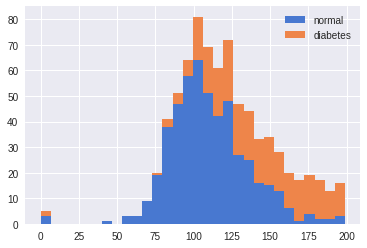

In [ ]:
# plasma를 기준으로 각각 정상과 당뇨가 어느 정도 비율로 분포하는지 살펴봅니다. 
plt.hist(x=[df.plasma[df.diabetes==0], 
            df.plasma[df.diabetes==1]], 
         bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()

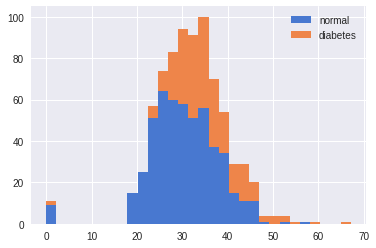

In [ ]:
# BMI를 기준으로 각각 정상과 당뇨가 어느 정도 비율로 분포하는지 살펴봅니다. 
plt.hist(x=[df.bmi[df.diabetes==0], 
            df.bmi[df.diabetes==1]], 
         bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()

###  --> TensorFlow

In [ ]:
# 세부 정보를 X로 지정합니다.
X = df.iloc[:,0:8]
# 당뇨병 여부를 y로 지정합니다.
y = df.iloc[:,8]

In [ ]:
# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid',name='Dense_3'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 1s 4ms/step - loss: 1.4684 - accuracy: 0.5104
Epoch 2/100
154/154 [==============================] - 1s 4ms/step - loss: 0.7465 - accuracy: 0.6055
Epoch 3/100
154/154 [==============================] - 1s 4ms/step - loss: 0.6849 - accuracy: 0.6198
Epoch 4/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6565 - accuracy: 0.6367
Epoch 5/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6302 - accuracy: 0.6562
Epoch 6/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.6641
Epoch 7/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.6615
Epoch 8/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6126 - accuracy: 0.6758
Epoch 9/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6096 - accuracy: 0.6784
Epoch 10/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6159 - accura

## **5. DL for Multi-class calassification** 
* Dataset: Iris

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###  --> Pandas를 활용한 데이터 조사

* 상관도 그래프

In [ ]:
import pandas as pd

# 아이리스 데이터를 불러옵니다.
df = pd.read_csv('/content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/iris3.csv')

In [ ]:
# 첫 5줄을 봅니다.
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

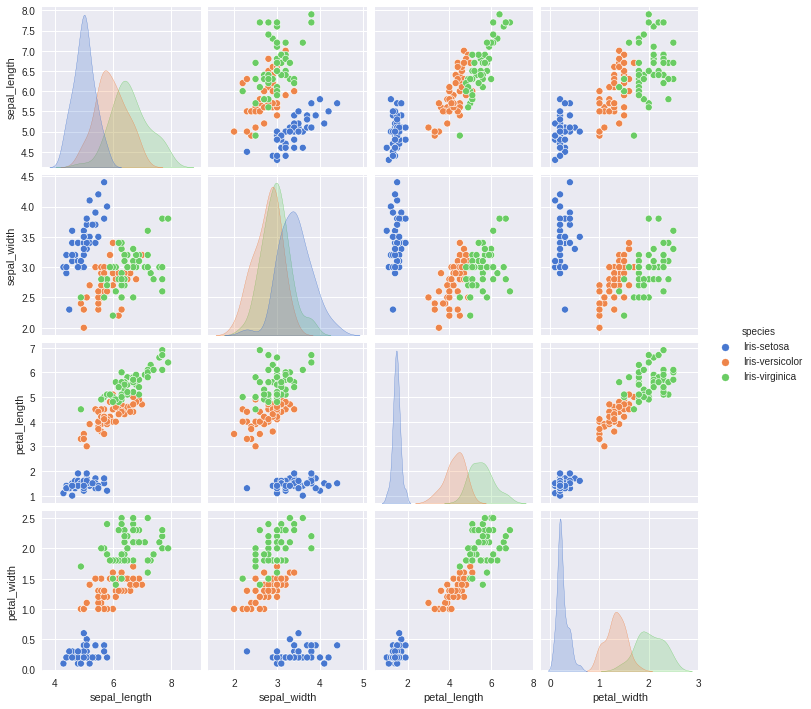

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프로 확인해 봅시다.
sns.pairplot(df, hue='species');
plt.show()

* 원-핫 인코딩

In [ ]:
# 속성을 X, 클래스를 y로 저장합니다.
X = df.iloc[:,0:4]
y = df.iloc[:,4]

# X와 y의 첫 5줄을 출력해 보겠습니다. 
print(X[0:5])
print(y[0:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [ ]:
# 원-핫 인코딩 처리를 합니다.
y = pd.get_dummies(y)

# 원-핫 인코딩 결과를 확인합니다.
print(y[0:5])

   Iris-setosa  Iris-versicolor  Iris-virginica
0            1                0               0
1            1                0               0
2            1                0               0
3            1                0               0
4            1                0               0


* 소프트맥스

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=4, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# 모델 실행
history=model.fit(X, y, epochs=30, batch_size=5)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                60        
                                                                 
 dense_5 (Dense)             (None, 8)                 104       
                                                                 
 dense_6 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
30/30 [==============================] - 0s 3ms/step - loss: 1.7289 - accuracy: 0.3333
Epoch 2/30
30/30 [==============================] - 0s 2ms/step - loss: 1.4221 - accuracy: 0.3333
Epoch 3/30
30/30 [==============================] - 0s 2ms/step - loss: 1.3052 - accuracy: 0.2333
Epoch 4/30
30/30 [========

###  --> TensorFlow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 아이리스 데이터를 불러옵니다.
df = pd.read_csv('/content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/iris3.csv')

# 속성을 X, 클래스를 y로 저장합니다.
X = df.iloc[:,0:4]
y = df.iloc[:,4]

# 원-핫 인코딩 처리를 합니다.
y = pd.get_dummies(y)

# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=4, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# 모델 실행
history=model.fit(X, y, epochs=50, batch_size=5)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 12)                60        
                                                                 
 dense_8 (Dense)             (None, 8)                 104       
                                                                 
 dense_9 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


## **6. Performance Evaluation (using K-fold cross validation to avoid overfitting)**
* Dataset: Sonar(binary)  
음파 탐지기의 수신 결과만 보고 광석인지 일반 암석인지를 구분하는 모델

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###  --> Overfitting

* 1.데이터의 확인과 예측 실행 (Overfitting)

In [2]:
import pandas as pd

# 광물 데이터를 불러옵니다.
df = pd.read_csv('/content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/sonar3.csv', header=None)

# 첫 5줄을 봅니다. 
df.head()

0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   0  
1  0.0052  0.0044   0  
2  0.0095  0.0078   0  
3  0.0040  0.0117   0  
4  0.0107  0.0094   0  

[5 rows x 61 columns]

In [3]:
# 일반 암석(0)과 광석(1)이 몇 개 있는지 확인합니다.
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

In [4]:
# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
21/21 [==============================] - 3s 5ms/step - loss: 0.6903 - accuracy: 0.5673
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6806 - accuracy: 0.6731
Epoch 3/200
21/21 [==============================] - 0s 4ms/step - loss: 0.6674 - accuracy: 0.7212
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6539 - accuracy: 0.6442
Epoch 5/200
21/21 [==============================] - 0s 4ms/step - loss: 0.6433 - accuracy: 0.6731
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6283 - accuracy: 0.6731
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6165 - accuracy: 0.6875
Epoch 8/200
21/21 [==============================] - 0s 4ms/step - loss: 0.6021 - accuracy: 0.6875
Epoch 9/200
21/21 [==============================] - 0s 4ms/step - loss: 0.5934 - accuracy: 0.7404
Epoch 10/200
21/21 [==============================] - 0s 5ms/step - loss: 0.5745 - accuracy: 0.7260
Epoch 11/

###  --> Training set & Test set

In [6]:

from sklearn.model_selection import train_test_split


In [7]:
# 학습셋과 테스트셋을 구분합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [8]:
# 모델을 설정합니다.
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
15/15 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.4966
Epoch 2/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5517
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.5862
Epoch 4/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.6138
Epoch 5/200
15/15 [==============================] - 0s 4ms/step - loss: 0.6660 - accuracy: 0.6690
Epoch 6/200
15/15 [==============================] - 0s 4ms/step - loss: 0.6523 - accuracy: 0.7310
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6344 - accuracy: 0.7379
Epoch 8/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6130 - accuracy: 0.7586
Epoch 9/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5967 - accuracy: 0.7862
Epoch 10/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5796 - accuracy: 0.7724
Epoch 11/

In [9]:
# 모델을 테스트셋에 적용해 정확도를 구합니다. 
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 6ms/step - loss: 0.6046 - accuracy: 0.8571
Test accuracy: 0.8571428656578064


###  --> 모델 저장과 재사용

In [10]:
# 모델 이름과 저장할 위치를 함께 지정합니다. 
model.save('./content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/model/my_model.hdf5') 

In [11]:
from tensorflow.keras.models import Sequential, load_model

In [12]:
# 테스트를 위해 조금 전 사용한 모델을 메모리에서 삭제합니다.
del model 

In [13]:
# 모델을 새로 불러옵니다.
model = load_model('./content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/model/my_model.hdf5') 

# 불러온 모델을 테스트셋에 적용해 정확도를 구합니다. 
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 8ms/step - loss: 0.6046 - accuracy: 0.8571
Test accuracy: 0.8571428656578064


###  --> k-fold cross valiation

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import pandas as pd

# 광물 데이터를 불러옵니다.
df = pd.read_csv('/content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/sonar3.csv', header=None)

# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [15]:
# 몇 겹으로 나눌 것인지를 정합니다. 
k=5

# KFold 함수를 불러옵니다. 분할하기 전에 샘플이 치우치지 않도록 섞어 줍니다.
kfold = KFold(n_splits=k, shuffle=True)

# 정확도가 채워질 빈 리스트를 준비합니다.
acc_score = []

def model_fn():
    model = Sequential() # 딥러닝 모델의 구조를 시작합니다.
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# K겹 교차 검증을 이용해 k번의 학습을 실행합니다. 
for train_index , test_index in kfold.split(X):  # for 문에 의해서 k번 반복합니다. spilt()에 의해 k개의 학습셋, 테스트셋으로 분리됩니다.
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]  
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]

    model = model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0) 
    
    accuracy = model.evaluate(X_test, y_test)[1]  # 정확도를 구합니다.
    acc_score.append(accuracy)  # 정확도 리스트에 저장합니다.

# k번 실시된 정확도의 평균을 구합니다.
avg_acc_score = sum(acc_score)/k

# 결과를 출력합니다.
print('정확도:', acc_score)
print('정확도 평균:', avg_acc_score)

2/2 [==============================] - 0s 8ms/step - loss: 1.5876 - accuracy: 0.7619


2/2 [==============================] - 0s 8ms/step - loss: 1.0087 - accuracy: 0.7857


2/2 [==============================] - 0s 8ms/step - loss: 0.4274 - accuracy: 0.8293
정확도: [0.8571428656578064, 0.761904776096344, 0.7857142686843872, 0.7804877758026123, 0.8292682766914368]
정확도 평균: 0.8029035925865173


## **7. Performance improvement(to find a best model)**
* Dataset: Wine(binary)
레드 와인과 화이트 와인을 구분하는 실험  
레드 와인 샘플: 1,599개  
화이트 와인 샘플 4,9898개  


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### -->  Train, Validation, Test

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 와인 데이터를 불러옵니다.
df = pd.read_csv('/content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

0     1     2    3      4     5      6        7     8     9     10  \
0      7.4  0.70  0.00  1.9  0.076  11.0   34.0  0.99780  3.51  0.56   9.4   
1      7.8  0.88  0.00  2.6  0.098  25.0   67.0  0.99680  3.20  0.68   9.8   
2      7.8  0.76  0.04  2.3  0.092  15.0   54.0  0.99700  3.26  0.65   9.8   
3     11.2  0.28  0.56  1.9  0.075  17.0   60.0  0.99800  3.16  0.58   9.8   
4      7.4  0.70  0.00  1.9  0.076  11.0   34.0  0.99780  3.51  0.56   9.4   
...    ...   ...   ...  ...    ...   ...    ...      ...   ...   ...   ...   
6492   6.2  0.21  0.29  1.6  0.039  24.0   92.0  0.99114  3.27  0.50  11.2   
6493   6.6  0.32  0.36  8.0  0.047  57.0  168.0  0.99490  3.15  0.46   9.6   
6494   6.5  0.24  0.19  1.2  0.041  30.0  111.0  0.99254  2.99  0.46   9.4   
6495   5.5  0.29  0.30  1.1  0.022  20.0  110.0  0.98869  3.34  0.38  12.8   
6496   6.0  0.21  0.38  0.8  0.020  22.0   98.0  0.98941  3.26  0.32  11.8   

      11  12  
0      5   1  
1      5   1  
2      5   1  
3      6   1  
4      5   1  
...   ..  ..  
6492   6   0  
6493   5   0  
6494   6   0  
6495   7   0  
6496   6   0  

[6497 rows x 13 columns]

In [18]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [19]:
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, 
                  epochs=50, batch_size=500, 
                  validation_split=0.25) # 0.8 x 0.25 = 0.2

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 30)                390       
                                                                 
 dense_22 (Dense)            (None, 12)                372       
                                                                 
 dense_23 (Dense)            (None, 8)                 104       
                                                                 
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 1s 26ms/step - loss: 41.1947 - accuracy: 0.2499 - val_loss: 36.6817 - val_accuracy: 0.2377
Epoch 2/50
8/8 [==============================]

In [20]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.9462
Test accuracy: 0.9461538195610046


### -->  Model Update

* 1.기본 코드 불러오기




In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 와인 데이터를 불러옵니다.
df = pd.read_csv('/content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 30)                390       
                                                                 
 dense_26 (Dense)            (None, 12)                372       
                                                                 
 dense_27 (Dense)            (None, 8)                 104       
                                                                 
 dense_28 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


* 2.모델의 저장 설정 및 실행

In [22]:
# 모델 저장의 조건을 설정합니다.
modelpath="/content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다. 
history=model.fit(X_train, y_train, 
                  epochs=50, batch_size=500, 
                  validation_split=0.25, verbose=0, 
                  callbacks=[checkpointer])


Epoch 1: saving model to /content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/model/all/01-0.2600.hdf5

Epoch 2: saving model to /content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/model/all/02-0.2600.hdf5

Epoch 3: saving model to /content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/model/all/03-0.2600.hdf5

Epoch 4: saving model to /content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/model/all/04-0.2600.hdf5

Epoch 5: saving model to /content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/model/all/05-0.2600.hdf5

Epoch 6: saving model to /content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/model/all/06-0.2600.hdf5

Epoch 7: saving

In [23]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.2627 - accuracy: 0.9523
Test accuracy: 0.9523077011108398


* 3.그래프로 과적합 확인하기

In [24]:
# 그래프 확인을 위한 긴 학습 
history=model.fit(X_train, y_train, 
                  epochs=2000, batch_size=500, 
                  validation_split=0.25)

Epoch 1/2000
8/8 [==============================] - 0s 46ms/step - loss: 0.2543 - accuracy: 0.9630 - val_loss: 0.2478 - val_accuracy: 0.9585
Epoch 2/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.2440 - accuracy: 0.9620 - val_loss: 0.2347 - val_accuracy: 0.9592
Epoch 3/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.2267 - accuracy: 0.9641 - val_loss: 0.2135 - val_accuracy: 0.9554
Epoch 4/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1965 - accuracy: 0.9605 - val_loss: 0.1715 - val_accuracy: 0.9531
Epoch 5/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1546 - accuracy: 0.9584 - val_loss: 0.1330 - val_accuracy: 0.9562
Epoch 6/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1287 - accuracy: 0.9556 - val_loss: 0.1168 - val_accuracy: 0.9569
Epoch 7/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1196 - accuracy: 0.9582 - val_loss: 0.1108 - val_accuracy: 0.9608
Epoch 8/2000
8/8 [=

In [25]:
# history에 저장된 학습 결과를 확인해 보겠습니다. 
hist_df=pd.DataFrame(history.history)
hist_df

loss  accuracy  val_loss  val_accuracy
0     0.254314  0.963049  0.247760      0.958462
1     0.244030  0.962022  0.234696      0.959231
2     0.226750  0.964075  0.213480      0.955385
3     0.196545  0.960482  0.171535      0.953077
4     0.154586  0.958430  0.133005      0.956154
...        ...       ...       ...           ...
1995  0.027298  0.993328  0.032426      0.988462
1996  0.027363  0.992815  0.033571      0.989231
1997  0.027977  0.992558  0.032644      0.990769
1998  0.028383  0.992558  0.037478      0.986923
1999  0.031997  0.991532  0.037979      0.986923

[2000 rows x 4 columns]

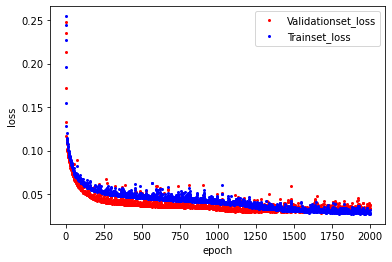

In [26]:
# y_vloss에 검증셋의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시합니다. 
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Validationset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

###  --> Early Stopping

* 1.기본 코드 불러오기

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# 와인 데이터를 불러옵니다.
df = pd.read_csv('/content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 30)                390       
                                                                 
 dense_30 (Dense)            (None, 12)                372       
                                                                 
 dense_31 (Dense)            (None, 8)                 104       
                                                                 
 dense_32 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


* 2.학습의 자동 중단 및 최적화 모델 저장

In [28]:
# 학습이 언제 자동 중단될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="/content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/model/EarlyStop-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss', 
                               verbose=0, 
                               save_best_only=True)

# 모델을 실행합니다.
history=model.fit(X_train, y_train, 
                  epochs=2000, batch_size=500, 
                  validation_split=0.25, verbose=1, 
                  callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000
8/8 [==============================] - 1s 62ms/step - loss: 5.3832 - accuracy: 0.2458 - val_loss: 3.5572 - val_accuracy: 0.2600
Epoch 2/2000
8/8 [==============================] - 0s 12ms/step - loss: 2.4459 - accuracy: 0.2456 - val_loss: 1.0674 - val_accuracy: 0.2600
Epoch 3/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.6021 - accuracy: 0.6341 - val_loss: 0.3478 - val_accuracy: 0.8315
Epoch 4/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3242 - accuracy: 0.8494 - val_loss: 0.3433 - val_accuracy: 0.8508
Epoch 5/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.2940 - accuracy: 0.8838 - val_loss: 0.2789 - val_accuracy: 0.9069
Epoch 6/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.2472 - accuracy: 0.9235 - val_loss: 0.2465 - val_accuracy: 0.9185
Epoch 7/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.2346 - accuracy: 0.9284 - val_loss: 0.2397 - val_accuracy: 0.9185
Epoch 8/2000


In [29]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9838
Test accuracy: 0.983846127986908


## **8. DL for Regression** 
* Dataset: Ames House Price  
Iowa주 Ames 지역의 2006~2010년 거랟된 실제 부동산 판매기록


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###  --> Preprocessing

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# 집 값 데이터를 불러옵니다.
df = pd.read_csv("/content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/house_train.csv")

# 데이터를 미리 살펴보겠습니다. 
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [32]:
# 데이터가 어떤 유형으로 이루어져 있는지 알아봅니다. 
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

* 2.결측치, 카테고리 변수 처리하기

In [33]:
# 속성별로 결측치가 몇 개인지 확인합니다.
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [34]:
# 카테고리형 변수를 0과 1로 이루어진 변수로 바꾸어 줍니다.
df = pd.get_dummies(df)

# 결측치를 전체 칼럼의 평균으로 대체하여 채워줍니다. 
df = df.fillna(df.mean())

# 업데이트된 데이터 프레임을 출력해봅니다.
df

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0          2003          2003       196.0         706  ...               0   
1          1976          1976         0.0         978  ...               0   
2          2001          2002       162.0         486  ...               0   
3          1915          1970         0.0         216  ...               0   
4          2000          2000       350.0         655  ...               0   
...         ...           ...         ...         ...  ...             ...   
1455       1999          2000         0.0           0  ...               0   
1456       1978          1988       119.0         790  ...               0   
1457       1941          2006         0.0         275  ...               0   
1458       1950          1996         0.0          49  ...               0   
1459       1965          1965         0.0         830  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0                0             0            1                      0   
1                0             0            1                      0   
2                0             0            1                      0   
3                0             0            1                      1   
4                0             0            1                      0   
...            ...           ...          ...                    ...   
1455             0             0            1                      0   
1456             0             0            1                      0   
1457             0             0            1                      0   
1458             0             0            1                      0   
1459             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1455                     1                      0  


* 3.속성별 관련도 추출하기

In [35]:
# 데이터 사이의 상관 관계를 저장합니다.
df_corr=df.corr()

# 집 값과 관련이 큰 것부터 순서대로 저장합니다.
df_corr_sort=df_corr.sort_values('SalePrice', ascending=False)

# 집 값과 관련도가 가장 큰 10개의 속성들을 출력합니다. 
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

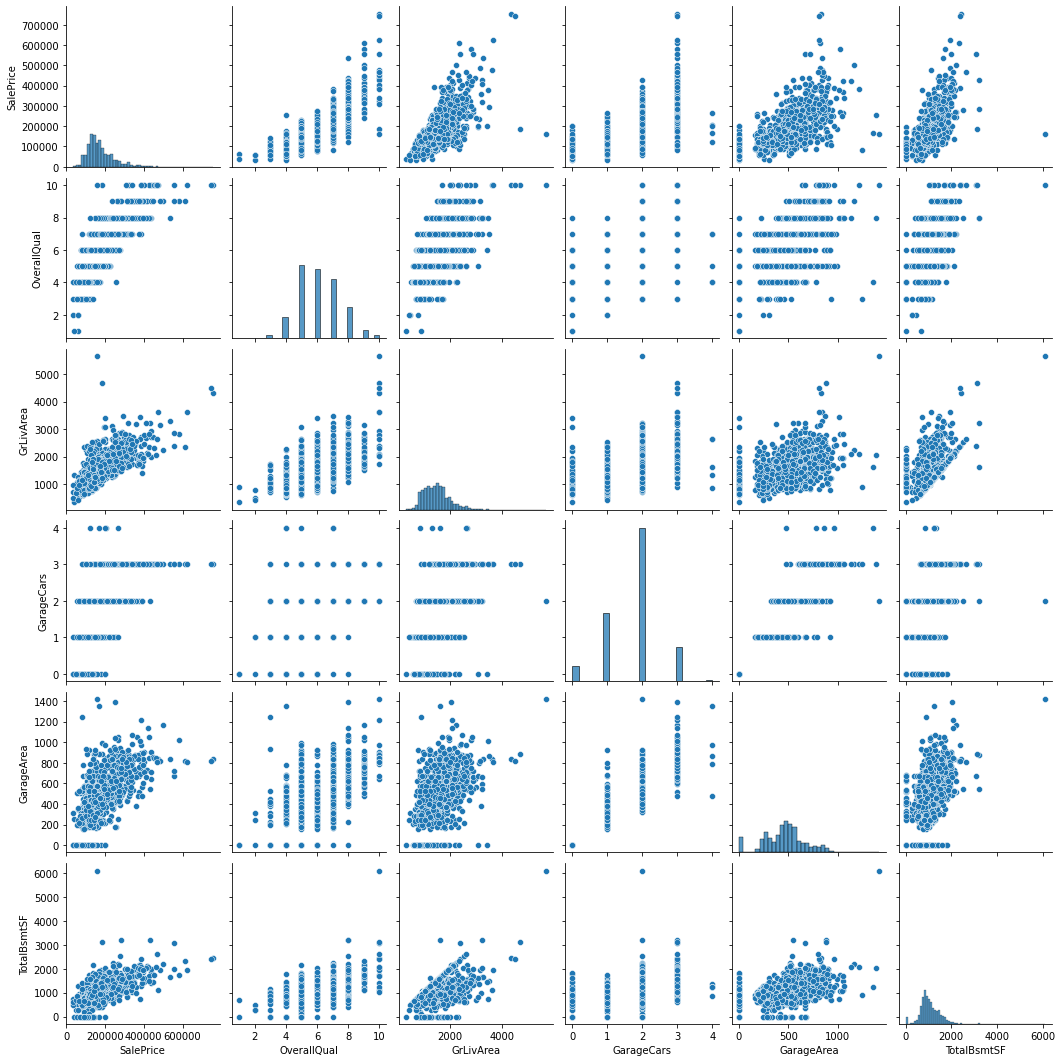

In [36]:
# 집 값과 관련도가 가장 높은 속성들을 추출해서 상관도 그래프를 그려봅니다.
cols=['SalePrice','OverallQual','GrLivArea',
      'GarageCars','GarageArea','TotalBsmtSF']
sns.pairplot(df[cols])
plt.show();

###  --> Prediction

In [37]:
# 집 값을 제외한 나머지 열을 저장합니다. 
cols_train=['OverallQual','GrLivArea',
            'GarageCars','GarageArea','TotalBsmtSF']
X_train_pre = df[cols_train]

# 집 값을 저장합니다.
y = df['SalePrice'].values

In [38]:
# 전체의 80%를 학습셋으로, 20%를 테스트셋으로 지정합니다.
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, 
                                                    test_size=0.2)

In [39]:
# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

# 모델을 실행합니다.
model.compile(optimizer ='adam', loss = 'mean_squared_error')

# 20회 이상 결과가 향상되지 않으면 자동으로 중단되게끔 합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 모델의 이름을 정합니다.
modelpath="/content/drive/MyDrive/D1_구dropbox/B1_과제/3_외부강의_멀캠_삼성전자_DeepLearning/0_교안/Colab_SMLDS/data/model/House.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss', verbose=0, 
                               save_best_only=True)

# 실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정합니다. 
history = model.fit(X_train, y_train, 
                    validation_split=0.25, 
                    epochs=2000, batch_size=32, 
                    callbacks=[early_stopping_callback, checkpointer])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                60        
                                                                 
 dense_34 (Dense)            (None, 30)                330       
                                                                 
 dense_35 (Dense)            (None, 40)                1240      
                                                                 
 dense_36 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,671
Trainable params: 1,671
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
28/28 [==============================] - 1s 22ms/step - loss: 39398289408.0000 - val_loss: 39104528384.0000
Epoch 2/2000
28/28 [==============================] - 0s 5ms/s

In [40]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듭니다.
real_prices =[]
pred_prices = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다. 
n_iter = 0
Y_prediction = model.predict(X_test).flatten()

# 바로 위 코드와 비교(욱)
#Y_prediction = model.predict(X_test)
#print(Y_prediction)

for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

10/10 [==============================] - 0s 2ms/step
실제가격: 129500.00, 예상가격: 132997.56
실제가격: 138500.00, 예상가격: 126363.48
실제가격: 123000.00, 예상가격: 145576.89
실제가격: 224900.00, 예상가격: 232098.47
실제가격: 187000.00, 예상가격: 187496.78
실제가격: 115000.00, 예상가격: 137248.61
실제가격: 140000.00, 예상가격: 171142.33
실제가격: 340000.00, 예상가격: 298140.84
실제가격: 192000.00, 예상가격: 223735.61
실제가격: 178000.00, 예상가격: 170382.62
실제가격: 40000.00, 예상가격: 134634.94
실제가격: 159000.00, 예상가격: 188248.39
실제가격: 89000.00, 예상가격: 85271.02
실제가격: 171000.00, 예상가격: 222484.17
실제가격: 187500.00, 예상가격: 206931.38
실제가격: 81000.00, 예상가격: 108496.67
실제가격: 250000.00, 예상가격: 271406.53
실제가격: 290000.00, 예상가격: 273236.59
실제가격: 113000.00, 예상가격: 129370.73
실제가격: 250000.00, 예상가격: 248784.77
실제가격: 137500.00, 예상가격: 164990.34
실제가격: 129000.00, 예상가격: 150868.48
실제가격: 201000.00, 예상가격: 219409.48
실제가격: 132000.00, 예상가격: 162361.16
실제가격: 133900.00, 예상가격: 116394.46


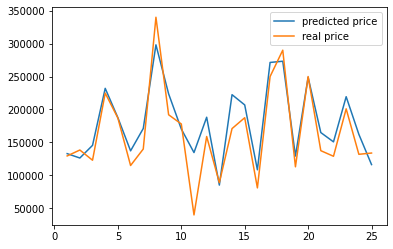

In [41]:
# 그래프를 통해 샘플로 뽑은 25개의 값을 비교해 봅니다.

plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()

## **9. Convolutional Neural Network** 
* Dataset: MNIST Digit Handwritting


1.   DNN 
2.   CNN





* 이미지를 인식하는 원리

In [42]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다. 
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 [==============================] - 0s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


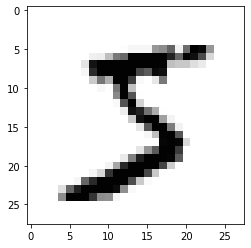

In [43]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [44]:
# 이미지가 인식되는 원리를 알아봅시다.
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-4s" % i)
    sys.stdout.write('\n')

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   3   18  18  18  126 136 175 26  166 255 247 127 0   0   0   0   
0   0   0   0   0   0   0   0   30  36  94  154 170 253 253 253 253 253 225 172 253 242 195 64  0   0   0   0   
0   0   0   0   0   0   0   49  238 253 253 253 253 253 253 253 253 251 93  82  82  56  39  0   0   0   0   0   
0   0   0   0   0   0   0   18  219 253 253 253 253 253 198 182 247 241 0   0   0   0   0   0   

In [45]:
print(X_train)
print(X_train.shape)
print(X_train.shape[0])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(60000, 28, 28)
60000


In [46]:
# 차원 변환 과정을 실습해 봅니다.
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스 값을 확인해 봅니다.
print("class : %d " % (y_train[0]))

# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


###  --> DNN (Deep Neural Network)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터를 불러옵니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 512)               401920    
                                                                 
 dense_38 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [48]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss', verbose=1, 
                               save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, 
                    validation_split=0.25, 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18478, saving model to ./MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.18478 to 0.13938, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13938 to 0.12438, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.12438 to 0.10472, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10472 to 0.09344, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09344 to 0.09219, saving model to ./MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.09219 to 0.08531, saving model to ./MNIST_MLP.hdf5

Epoch 8: val_loss improved from 0.08531 to 0.08054, saving model to ./MNIST_MLP.hdf5

Epoch 9: val_loss improved from 0.08054 to 0.08031, saving model to ./MNIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.08031

Epoch 11: val_loss did not improve from 0.08031

Epoch 12: val_loss improved from 0.08031 to 0.07983, saving model to ./MNIST_MLP.hdf5

Epoch 13: val_loss did not improve from 0.07

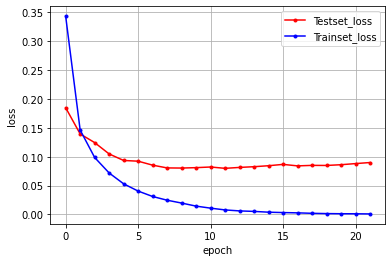

In [49]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

###  --> CNN (Convolutional Neural Network)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss', verbose=1, 
                               save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, 
                    validation_split=0.25, 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.08562, saving model to ./MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.08562 to 0.05725, saving model to ./MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05725 to 0.04590, saving model to ./MNIST_CNN.hdf5

Epoch 4: val_loss did not improve from 0.04590

Epoch 5: val_loss did not improve from 0.04590

Epoch 6: val_loss improved from 0.04590 to 0.04246, saving model to ./MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.04246 to 0.04086, saving model to ./MNIST_CNN.hdf5

Epoch 8: val_loss did not improve from 0.04086

Epoch 9: val_loss did not improve from 0.04086

Epoch 10: val_loss improved from 0.04086 to 0.03997, saving model to ./MNIST_CNN.hdf5

Epoch 11: val_loss did not improve from 0.03997

Epoch 12: val_loss did not improve from 0.03997

Epoch 13: val_loss improved from 0.03997 to 0.03851, saving model to ./MNIST_CNN.hdf5

Epoch 14: val_loss did not improve from 0.03851

Epoch 15: val_loss did not improve from 0.03851

Epoch 16: v

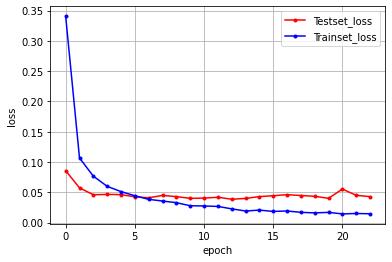

In [51]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## **10. Recurrent Neural Network** 
* Dataset: Coca-Cola Stock Price

###  --> Data loading
* FinanceDataReader 패키지 설치

In [52]:
pip install finance-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




*   미국주식의 경우 종목의 ticker(알파벳 몇 글자로 주식을 구분: 코카콜라 'KO', 애플 'AAPL')로 불러온다.
*   한국주식의 경우 코스피 종목 코드(숫자 6자리)로 불러온다.



In [53]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

stock = fdr.DataReader('KO', '2010-01-01', '2019-12-31')
print(stock)

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2010-01-04  28.580000  28.610001  28.450001  28.520000  19.081615  13870400
2010-01-05  28.424999  28.495001  28.070000  28.174999  18.850788  23172400
2010-01-06  28.174999  28.219999  27.990000  28.165001  18.844095  19264600
2010-01-07  28.165001  28.184999  27.875000  28.094999  18.797270  13234600
2010-01-08  27.730000  27.820000  27.375000  27.575001  18.449358  28712400
...               ...        ...        ...        ...        ...       ...
2019-12-23  55.000000  55.240002  54.840000  54.910000  49.991440   9300800
2019-12-24  54.799999  55.000000  54.639999  54.709999  49.809353   3359300
2019-12-26  54.919998  55.020000  54.790001  55.020000  50.091583   6228500
2019-12-27  55.009998  55.450001  55.000000  55.349998  50.392017   6895500
2019-12-30  55.180000  55.389999  55.060001  55.270000  50.319191   6431700

[2515 rows 

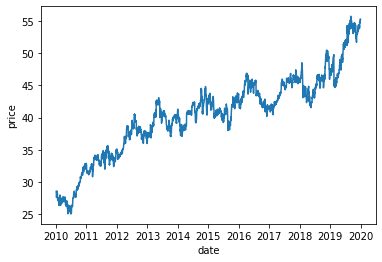

In [54]:
prices = np.asarray(stock['Close'], dtype='float32')

plt.figure()
plt.plot(stock.index, prices)
plt.xlabel('date')
plt.ylabel('price')
plt.show()

###  --> Preprocessing
* 1.정규화 (0~1)



In [55]:
prices = np.asarray(stock['Close'], dtype='float32')
y = (prices - min(prices))/(max(prices)-min(prices))
print(y)

[0.11396524 0.10274751 0.10242242 ... 0.9756137  0.9863436  0.9837425 ]


* 2.시계열 학습을 위한 데이터 구조로 변환

(일차원 배열로 되어 있는 주가 데이터를 과거 60일을 보고 다음 날을 예측할 수 있는 구조로 변환)


> 입력 데이터의 행 수는 데이터의 길이 data_length임이 분명하다. 각 데이터 건마다 LSTM의 입력으로 쓰기 위한 구조를 만들어 주어야 하는데, Keras의 LSTM은 한번 입력값을 받을 때 (기간 수 * 특성치 갯수)를 입력으로 받는다. 즉, 기간이 60일이고, 특성치는 주식 종가로서 하나 뿐이므로, 각 데이터 건마다 (60*1)의 형태가 필요하다.
즉, 입력 데이터는 (data_lengh, window_size, 1)의 형태로 x_data를 초기화 한다.




In [56]:
window_size = 60
data_length = len(y) - window_size
y_data = np.zeros(data_length, dtype='float32')
x_data = np.zeros((data_length, window_size, 1), dtype='float32')

for i in range(0, data_length):
    y_data[i]=y[i+window_size]
    x_data[i]=y[i:i+window_size].reshape(window_size,1)


* 3.데이터를 학습용과 테스트용으로 구분
(시계열 데이터는 테스트 데이터를 랜덤하게 뽑아오면 무의미해지므로 'shuffle=False'로 옵션 설정)



In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
 test_size=0.3, shuffle=False)


### -->  LSTM 
> 3계층으로 구성된 신경망
* 입력층: 직전 60일간의 주가이므로 (60, 1)
* 첫 번째 은닉층: LSTM을 30개
* 두 번째 은닉층: LSTM을 30개
* 출력층 : 내일의 주가를 예측하는 것이므로 1개












> 주의:
- 첫 번째 은닉층의 각각의 LSTM 셀은 두 번째 은닉층으로 값을 넘겨주어야 하는데, 두 번재 은닉층에도 각각이 LSTM 이어서 60개씩의 순차적인 값을 입력으로 받아야 한다.
- 따라서, 첫 번재 은닉층의 LSTM은 단일값이 아니라 자신이 시간축을 따라가면서 수정해온 60개의 순차적인 은닉 상태값을 보내주서야 한다.
- 이것은 Keras에서는 return_sequences 옵션에 True 값을 줌으로써 가능하다.
- 두 번째 계층의 LSTM도 입력 형태는 동일하지만, 그 다음 계층이 일반적인 뉴런이어서 출력값은 단일값으로 충분하므로return_sequences 옵션을 주지 않는다.



In [58]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.LSTM(30, return_sequences = True,
                      input_shape=(window_size, 1)),
    keras.layers.LSTM(30, input_shape=(window_size, 1)),
    keras.layers.Dense(1, activation=None),
])

In [59]:

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=30)


Epoch 1/30
54/54 [==============================] - 4s 9ms/step - loss: 0.0184
Epoch 2/30
54/54 [==============================] - 0s 8ms/step - loss: 9.8838e-04
Epoch 3/30
54/54 [==============================] - 0s 8ms/step - loss: 6.6950e-04
Epoch 4/30
54/54 [==============================] - 0s 8ms/step - loss: 6.5726e-04
Epoch 5/30
54/54 [==============================] - 0s 8ms/step - loss: 6.4128e-04
Epoch 6/30
54/54 [==============================] - 1s 9ms/step - loss: 6.2224e-04
Epoch 7/30
54/54 [==============================] - 1s 12ms/step - loss: 6.1284e-04
Epoch 8/30
54/54 [==============================] - 1s 12ms/step - loss: 5.8178e-04
Epoch 9/30
54/54 [==============================] - 1s 13ms/step - loss: 5.7442e-04
Epoch 10/30
54/54 [==============================] - 1s 12ms/step - loss: 5.6528e-04
Epoch 11/30
54/54 [==============================] - 1s 16ms/step - loss: 5.4325e-04
Epoch 12/30
54/54 [==============================] - 1s 14ms/step - loss: 5.4589e-04

In [60]:
pred = model.predict(x_test) 

24/24 [==============================] - 2s 5ms/step


> 처음에 신경망에 학습시켜준 정답값이 주가를 0과 1 사이로 변환한 값이었으므로, 신경망이 예측한 값도 0과 1 사이이다. 

> 이제 이 값을 원래의 주가로 환원시켜준다.



In [61]:
pred_price = (max(prices)-min(prices))*pred + min(prices)
target_price = (max(prices)-min(prices))*y_test + min(prices)

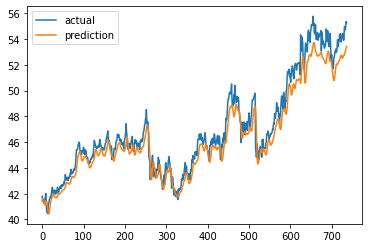

In [62]:
plt.figure()
plt.plot(target_price, label='actual')
plt.plot(pred_price, label='prediction')
plt.legend()
plt.show() 

## **11. GAN & Generative Model** 
* Dataset: MNIST Digit Handwritting 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 14ms/step
epoch:1504  d_loss:0.2928  g_loss:2.0889
1/1 [==============================] - 0s 17ms/step
epoch:1505  d_loss:0.3390  g_loss:2.2061
1/1 [==============================] - 0s 13ms/step
epoch:1506  d_loss:0.4933  g_loss:1.9204
1/1 [==============================] - 0s 14ms/step
epoch:1507  d_loss:0.5316  g_loss:1.7174
1/1 [==============================] - 0s 13ms/step
epoch:1508  d_loss:0.5382  g_loss:1.8649
1/1 [==============================] - 0s 13ms/step
epoch:1509  d_loss:0.4829  g_loss:2.0287
1/1 [==============================] - 0s 16ms/step
epoch:1510  d_loss:0.5242  g_loss:1.7721
1/1 [==============================] - 0s 15ms/step
epoch:1511  d_loss:0.4258  g_loss:1.5923
1/1 [==============================] - 0s 17ms/step
epoch:1512  d_loss:0.4537  g_loss:2.1491
1/1 [==============================] - 0s 25ms/step
epoch:1513  d_loss:0.3892  g_loss:1.7913
1/1 [=============================

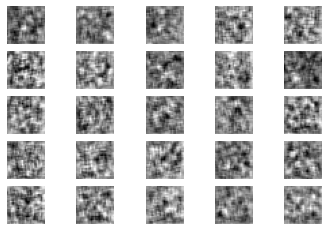

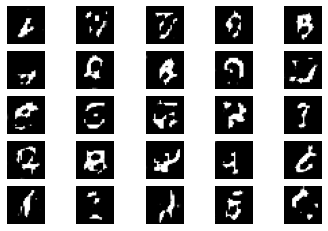

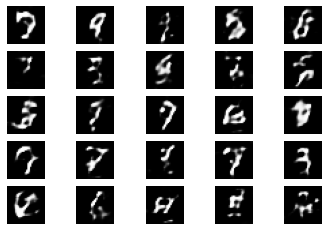

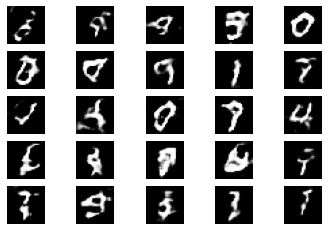

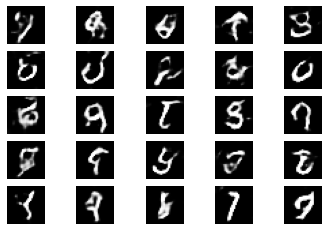

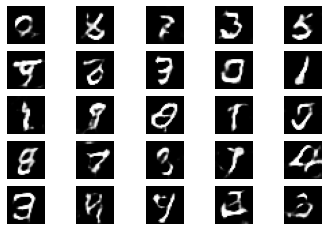

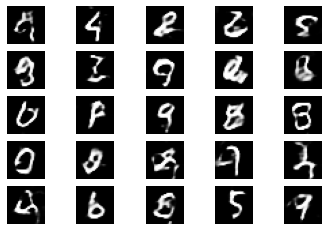

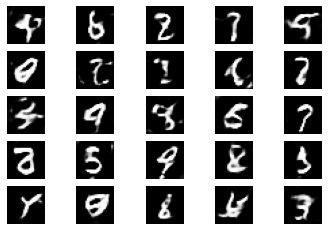

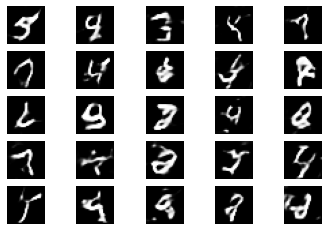

In [63]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import matplotlib.pyplot as plt

# 생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

# 판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False

# 생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

# 신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):

  # MNIST 데이터를 불러옵니다.

  (X_train, _), (_, _) = mnist.load_data()  # 앞서 불러온 적 있는 MNIST를 다시 이용합니다. 단, 테스트 과정은 필요 없고 이미지만 사용할 것이기 때문에 X_train만 불러왔습니다.
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5  # 픽셀 값은 0에서 255 사이의 값입니다. 이전에 255로 나누어 줄때는 이를 0~1 사이의 값으로 바꾸었던 것인데, 여기서는 127.5를 빼준 뒤 127.5로 나누어 줌으로 인해 -1에서 1사이의 값으로 바뀌게 됩니다.
  # X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

  true = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for i in range(epoch):
          # 실제 데이터를 판별자에 입력하는 부분입니다.
          idx = np.random.randint(0, X_train.shape[0], batch_size)
          imgs = X_train[idx]
          d_loss_real = discriminator.train_on_batch(imgs, true)

          # 가상 이미지를 판별자에 입력하는 부분입니다.
          noise = np.random.normal(0, 1, (batch_size, 100))
          gen_imgs = generator.predict(noise)
          d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

          # 판별자와 생성자의 오차를 계산합니다.
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
          g_loss = gan.train_on_batch(noise, true)

          print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # 이 부분은 중간 과정을 이미지로 저장해 주는 부분입니다. 이 장의 주요 내용과 관련이 없어
        # 소스 코드만 첨부합니다. 만들어진 이미지들은 gan_images 폴더에 저장됩니다.
          if i % saving_interval == 0:
              #r, c = 5, 5
              noise = np.random.normal(0, 1, (25, 100))
              gen_imgs = generator.predict(noise)

              # Rescale images 0 - 1
              gen_imgs = 0.5 * gen_imgs + 0.5

              fig, axs = plt.subplots(5, 5)
              count = 0
              for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                      axs[j, k].axis('off')
                      count += 1
              fig.savefig("./gan_mnist_%d.png" % i)

gan_train(4001, 32, 500)  # 4000번 반복되고(+1을 하는 것에 주의), 배치 사이즈는 32,  500번마다 결과가 저장되게 하였습니다.


## **12. AutoEncoder** 
* Dataset: MNIST Digit Handwritting

In [64]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터셋을 불러옵니다.

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 생성자 모델을 만듭니다.
autoencoder = Sequential()

# 인코딩 부분입니다.
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩 부분입니다. 
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

# 전체 구조를 확인합니다.
autoencoder.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 8)         

Epoch 1/50
469/469 [==============================] - 4s 7ms/step - loss: 0.2038 - val_loss: 0.1349
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1270 - val_loss: 0.1191
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1162 - val_loss: 0.1115
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1099 - val_loss: 0.1063
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1057 - val_loss: 0.1027
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1028 - val_loss: 0.1003
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1007 - val_loss: 0.0987
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0990 - val_loss: 0.0970
Epoch 9/50
469/469 [==============================] - 3s 5ms/step - loss: 0.0976 - val_loss: 0.0964
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0966 - val_loss: 0.0948

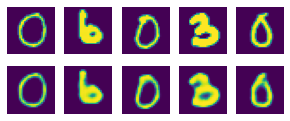

In [65]:
# 컴파일 및 학습을 하는 부분입니다.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# 학습된 결과를 출력하는 부분입니다.
random_test = np.random.randint(X_test.shape[0], size=5)  # 테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)                     # 앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))                         # 출력될 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):        # 랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))   # 테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))  # 오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()

# [End]